In [4]:
#imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
import holoviews as hv
import numpy as np
import json
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
from yahoo_fin.stock_info import get_data
from scipy.stats import variation

%matplotlib inline



In [5]:
# make lists for stocks for selected indexes
utilities_tickers = ["AWK","NEE","XEL"]
consumer_staples_tickers = ["COST","WMT"]
consumer_disc_ticker = ["AMZN","DLTR"]
tech_tickers = ["ORCL","AAPL","NFLX"]

In [6]:
# create function to obtain utilities stock data for 2008-2009
def utilities_data_2008(index_number):

    ticker_data_2008 = get_data(utilities_tickers[index_number], start_date = "2008/03/29", end_date = "2009/03/29", index_as_date = True, interval = "1d")
    return ticker_data_2008

In [7]:
awk_2008 = utilities_data_2008(0)
awk_2008

,open,high,low,close,adjclose,volume,ticker
2008-04-23,20.600000,21.450001,20.219999,20.600000,14.759792,23402800,AWK
2008-04-24,20.719999,21.000000,20.309999,20.809999,14.910254,4960900,AWK
2008-04-25,21.000000,21.250000,20.700001,21.170000,15.168197,1956800,AWK
2008-04-28,21.490000,21.490000,20.809999,21.000000,15.046388,709400,AWK
2008-04-29,21.389999,21.389999,20.820000,21.070000,15.096547,859700,AWK
...,...,...,...,...,...,...,...
2009-03-23,18.650000,18.650000,17.930000,18.049999,13.310615,406700,AWK
2009-03-24,18.059999,18.840000,17.950001,18.090000,13.340115,416000,AWK
2009-03-25,18.090000,18.520000,18.030001,18.379999,13.553971,215800,AWK
2009-03-26,18.500000,18.520000,18.250000,18.510000,13.649835,275500,AWK


In [8]:
nee_2008 = utilities_data_2008(1)
nee_2008

,open,high,low,close,adjclose,volume,ticker
2008-03-31,15.4550,15.777500,15.370000,15.685000,10.484972,8689600,NEE
2008-04-01,15.7350,16.245001,15.687500,16.222500,10.844274,8762000,NEE
2008-04-02,16.2050,16.625000,16.180000,16.442499,10.991341,9597200,NEE
2008-04-03,16.3475,16.535000,16.322500,16.445000,10.993009,8924800,NEE
2008-04-04,16.4375,16.750000,16.379999,16.487499,11.021420,5431600,NEE
...,...,...,...,...,...,...,...
2009-03-23,12.5575,12.745000,12.377500,12.725000,8.792143,9484400,NEE
2009-03-24,12.6050,12.912500,12.505000,12.775000,8.826688,13220000,NEE
2009-03-25,12.7850,13.057500,12.750000,12.930000,8.933784,12907200,NEE
2009-03-26,13.0125,13.062500,12.752500,12.942500,8.942421,11234000,NEE


In [9]:
xel_2008 = utilities_data_2008(2)
xel_2008

,open,high,low,close,adjclose,volume,ticker
2008-03-31,19.850000,20.040001,19.740000,19.950001,12.296503,2497000,XEL
2008-04-01,20.120001,20.430000,20.020000,20.420000,12.586199,3064900,XEL
2008-04-02,20.480000,20.780001,20.410000,20.540001,12.660159,3102100,XEL
2008-04-03,20.459999,20.719999,20.450001,20.500000,12.635506,1965800,XEL
2008-04-04,20.459999,20.910000,20.459999,20.620001,12.709471,1553500,XEL
...,...,...,...,...,...,...,...
2009-03-23,18.410000,18.790001,18.250000,18.770000,11.999063,3797900,XEL
2009-03-24,18.510000,18.530001,18.080000,18.120001,11.732306,4623800,XEL
2009-03-25,18.309999,18.360001,17.900000,18.120001,11.732306,3363400,XEL
2009-03-26,18.219999,18.379999,17.860001,18.379999,11.900649,3799600,XEL


In [10]:
# clean stock data to only yield adjusted close price
xel_2008_df = xel_2008.reset_index()
xel_2008_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
xel_2008_df = xel_2008_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
xel_2008_df = xel_2008_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
xel_2008_df

Ticker,XEL
Date,
2008-03-31,12.296503
2008-04-01,12.586199
2008-04-02,12.660159
2008-04-03,12.635506
2008-04-04,12.709471
...,...
2009-03-23,11.999063
2009-03-24,11.732306
2009-03-25,11.732306


In [11]:
# clean stock data to only yield adjusted close price
nee_2008_df = nee_2008.reset_index()
nee_2008_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
nee_2008_df = nee_2008_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
nee_2008_df = nee_2008_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
nee_2008_df

Ticker,NEE
Date,
2008-03-31,10.484972
2008-04-01,10.844274
2008-04-02,10.991341
2008-04-03,10.993009
2008-04-04,11.021420
...,...
2009-03-23,8.792143
2009-03-24,8.826688
2009-03-25,8.933784


In [12]:
# clean stock data to only yield adjusted close price
nee_2008_df = nee_2008.reset_index()
nee_2008_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
nee_2008_df = nee_2008_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
nee_2008_df = nee_2008_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
nee_2008_df

Ticker,NEE
Date,
2008-03-31,10.484972
2008-04-01,10.844274
2008-04-02,10.991341
2008-04-03,10.993009
2008-04-04,11.021420
...,...
2009-03-23,8.792143
2009-03-24,8.826688
2009-03-25,8.933784


In [13]:
# clean stock data to only yield adjusted close price
awk_2008_df = awk_2008.reset_index()
awk_2008_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
awk_2008_df = awk_2008_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
awk_2008_df = awk_2008_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
awk_2008_df

Ticker,AWK
Date,
2008-04-23,14.759792
2008-04-24,14.910254
2008-04-25,15.168197
2008-04-28,15.046388
2008-04-29,15.096547
...,...
2009-03-23,13.310615
2009-03-24,13.340115
2009-03-25,13.553971


In [14]:
# combine all utilities holdings into one dataframe for further calculations
utilities2008_df = pd.concat([awk_2008_df,nee_2008_df,xel_2008_df], axis = "columns", join = "inner")
utilities2008_df

Ticker,AWK,NEE,XEL
Date,,,
2008-04-23,14.759792,11.315546,12.783431
2008-04-24,14.910254,11.195220,12.734123
2008-04-25,15.168197,11.135059,12.709471
2008-04-28,15.046388,11.103307,12.777269
2008-04-29,15.096547,11.183524,12.801923
...,...,...,...
2009-03-23,13.310615,8.792143,11.999063
2009-03-24,13.340115,8.826688,11.732306
2009-03-25,13.553971,8.933784,11.732306


In [15]:
# create function to obtain consumer staples stock data for 2008-2009
def consumer_staples_2008(index_number):

    ticker_data = get_data(consumer_staples_tickers[index_number], start_date = "2008/03/29", end_date = "2009/03/29", index_as_date = True, interval = "1d")
    return ticker_data

In [16]:
cost_2008 = consumer_staples_2008(0)
cost_2008

,open,high,low,close,adjclose,volume,ticker
2008-03-31,64.919998,65.389999,63.740002,64.970001,47.579350,4127800,COST
2008-04-01,65.180000,66.870003,65.110001,66.489998,48.692478,5742800,COST
2008-04-02,65.940002,66.930000,65.739998,66.250000,48.516727,3978400,COST
2008-04-03,66.129997,67.050003,66.019997,66.870003,48.970772,3128500,COST
2008-04-04,66.440002,66.970001,66.199997,66.449997,48.663200,3712800,COST
...,...,...,...,...,...,...,...
2009-03-23,45.480000,47.540001,45.250000,47.540001,35.212437,6274500,COST
2009-03-24,47.419998,48.000000,46.259998,46.360001,34.338428,5045800,COST
2009-03-25,46.509998,47.759998,45.570000,46.810001,34.671730,6118800,COST
2009-03-26,47.369999,49.349998,47.060001,48.459999,35.893871,6826500,COST


In [17]:
wmt_2008 = consumer_staples_2008(1)
wmt_2008

,open,high,low,close,adjclose,volume,ticker
2008-03-31,52.200001,53.110001,51.630001,52.680000,39.072090,19594400,WMT
2008-04-01,53.189999,54.160000,52.810001,54.080002,40.110462,24232600,WMT
2008-04-02,54.310001,54.889999,54.000000,54.459999,40.392303,21720300,WMT
2008-04-03,54.099998,55.200001,53.990002,54.930000,40.740879,23190400,WMT
2008-04-04,54.910000,54.950001,54.220001,54.400002,40.347786,20728100,WMT
...,...,...,...,...,...,...,...
2009-03-23,50.279999,51.480000,49.349998,51.480000,38.882446,19679700,WMT
2009-03-24,51.000000,51.599998,50.590000,51.080002,38.580322,20636600,WMT
2009-03-25,51.270000,52.290001,50.639999,51.680000,39.033493,23444700,WMT
2009-03-26,52.060001,53.000000,51.950001,52.759998,39.849213,25049500,WMT


In [18]:
# clean stock data to only yield adjusted close price
wmt_2008_df = wmt_2008.reset_index()
wmt_2008_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
wmt_2008_df = wmt_2008_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
wmt_2008_df = wmt_2008_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
wmt_2008_df

Ticker,WMT
Date,
2008-03-31,39.072090
2008-04-01,40.110462
2008-04-02,40.392303
2008-04-03,40.740879
2008-04-04,40.347786
...,...
2009-03-23,38.882446
2009-03-24,38.580322
2009-03-25,39.033493


In [19]:
# clean stock data to only yield adjusted close price
cost_2008_df = cost_2008.reset_index()
cost_2008_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
cost_2008_df = cost_2008_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
cost_2008_df = cost_2008_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
cost_2008_df

Ticker,COST
Date,
2008-03-31,47.579350
2008-04-01,48.692478
2008-04-02,48.516727
2008-04-03,48.970772
2008-04-04,48.663200
...,...
2009-03-23,35.212437
2009-03-24,34.338428
2009-03-25,34.671730


In [20]:
# combine all comsumer staples stock data into one dataframe for further calculations
consumer_staples2008_df = pd.concat([cost_2008_df,wmt_2008_df], axis = "columns", join = "inner")
consumer_staples2008_df

Ticker,COST,WMT
Date,,
2008-03-31,47.579350,39.072090
2008-04-01,48.692478,40.110462
2008-04-02,48.516727,40.392303
2008-04-03,48.970772,40.740879
2008-04-04,48.663200,40.347786
...,...,...
2009-03-23,35.212437,38.882446
2009-03-24,34.338428,38.580322
2009-03-25,34.671730,39.033493


In [21]:
# create function to obtain consumer discretionary stock data for 2008-2009
def consumer_discretionary_2008(index_number):

    ticker_data = get_data(consumer_disc_ticker[index_number], start_date = "2008/03/29", end_date = "2009/03/29", index_as_date = True, interval = "1d")
    return ticker_data

In [22]:
amzn_2008 = consumer_discretionary_2008(0)
amzn_2008

,open,high,low,close,adjclose,volume,ticker
2008-03-31,70.250000,71.639999,69.629997,71.300003,71.300003,5470300,AMZN
2008-04-01,72.989998,77.089996,72.760002,76.699997,76.699997,9734000,AMZN
2008-04-02,77.080002,79.000000,76.120003,77.370003,77.370003,8592400,AMZN
2008-04-03,75.150002,76.010002,73.809998,74.940002,74.940002,8149900,AMZN
2008-04-04,75.260002,77.830002,74.279999,76.870003,76.870003,7152800,AMZN
...,...,...,...,...,...,...,...
2009-03-23,71.360001,75.610001,70.699997,75.580002,75.580002,8612400,AMZN
2009-03-24,74.849998,75.000000,72.309998,72.809998,72.809998,7457900,AMZN
2009-03-25,73.089996,73.949997,69.839996,72.400002,72.400002,7895600,AMZN
2009-03-26,73.470001,74.980003,72.639999,73.690002,73.690002,6657700,AMZN


In [23]:
dltr_2008 = consumer_discretionary_2008(1)
dltr_2008

,open,high,low,close,adjclose,volume,ticker
2008-03-31,8.990000,9.303333,8.946667,9.196667,9.196667,4285800,DLTR
2008-04-01,9.303333,9.886667,9.303333,9.710000,9.710000,4965300,DLTR
2008-04-02,9.923333,10.230000,9.826667,10.023333,10.023333,6095400,DLTR
2008-04-03,9.963333,10.026667,9.626667,9.943333,9.943333,3893700,DLTR
2008-04-04,9.926667,9.943333,9.623333,9.766667,9.766667,4053300,DLTR
...,...,...,...,...,...,...,...
2009-03-23,13.670000,13.893333,13.423333,13.793333,13.793333,8109600,DLTR
2009-03-24,13.370000,13.866667,13.370000,13.470000,13.470000,8793600,DLTR
2009-03-25,13.600000,14.110000,13.526667,14.080000,14.080000,7148400,DLTR
2009-03-26,14.090000,14.646667,14.070000,14.573333,14.573333,6327000,DLTR


In [24]:
# clean stock data to only yield adjusted close price
amzn_2008_df = amzn_2008.reset_index()
amzn_2008_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
amzn_2008_df = amzn_2008_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
amzn_2008_df = amzn_2008_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
amzn_2008_df

Ticker,AMZN
Date,
2008-03-31,71.300003
2008-04-01,76.699997
2008-04-02,77.370003
2008-04-03,74.940002
2008-04-04,76.870003
...,...
2009-03-23,75.580002
2009-03-24,72.809998
2009-03-25,72.400002


In [25]:
# clean stock data to only yield adjusted close price
dltr_2008_df = dltr_2008.reset_index()
dltr_2008_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
dltr_2008_df = dltr_2008_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
dltr_2008_df = dltr_2008_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
dltr_2008_df

Ticker,DLTR
Date,
2008-03-31,9.196667
2008-04-01,9.710000
2008-04-02,10.023333
2008-04-03,9.943333
2008-04-04,9.766667
...,...
2009-03-23,13.793333
2009-03-24,13.470000
2009-03-25,14.080000


In [26]:
# combine all consumer discretionary stock data into one dataframe for further calculations
consumer_disc2008_df = pd.concat([amzn_2008_df,dltr_2008_df], axis = "columns", join = "inner")
consumer_disc2008_df

Ticker,AMZN,DLTR
Date,,
2008-03-31,71.300003,9.196667
2008-04-01,76.699997,9.710000
2008-04-02,77.370003,10.023333
2008-04-03,74.940002,9.943333
2008-04-04,76.870003,9.766667
...,...,...
2009-03-23,75.580002,13.793333
2009-03-24,72.809998,13.470000
2009-03-25,72.400002,14.080000


In [27]:
# create function to obtain tech stock data for 2008-2009
def tech_data_2008(index_number):

    ticker_data = get_data(tech_tickers[index_number], start_date = "2008/03/29", end_date = "2009/03/29", index_as_date = True, interval = "1d")
    return ticker_data

In [28]:
orcl_2008 = tech_data_2008(0)
orcl_2008

,open,high,low,close,adjclose,volume,ticker
2008-03-31,19.480000,19.629999,19.389999,19.559999,16.746861,32073900,ORCL
2008-04-01,19.910000,20.420000,19.719999,20.410000,17.474607,44724400,ORCL
2008-04-02,20.410000,20.760000,20.260000,20.490000,17.543110,32243000,ORCL
2008-04-03,20.400000,20.700001,20.270000,20.680000,17.705774,36848900,ORCL
2008-04-04,20.610001,20.690001,20.309999,20.350000,17.423233,53991200,ORCL
...,...,...,...,...,...,...,...
2009-03-23,17.340000,18.250000,17.260000,18.250000,15.625269,46048300,ORCL
2009-03-24,17.900000,18.219999,17.700001,17.910000,15.334163,32228100,ORCL
2009-03-25,18.030001,18.340000,17.700001,18.090000,15.488276,34714200,ORCL
2009-03-26,18.250000,18.680000,18.180000,18.680000,15.993420,34216000,ORCL


In [29]:
aapl_2008 = tech_data_2008(1)
aapl_2008

,open,high,low,close,adjclose,volume,ticker
2008-03-31,5.116786,5.203929,5.090000,5.125000,4.414486,768065200,AAPL
2008-04-01,5.225000,5.345000,5.128929,5.340357,4.599988,1032567200,AAPL
2008-04-02,5.313571,5.400000,5.208929,5.267500,4.537231,1044968400,AAPL
2008-04-03,5.252143,5.486786,5.250000,5.414643,4.663975,1051568000,AAPL
2008-04-04,5.435357,5.525357,5.383929,5.467143,4.709197,854417200,AAPL
...,...,...,...,...,...,...,...
2009-03-23,3.668214,3.862857,3.633929,3.845000,3.311943,666397200,AAPL
2009-03-24,3.798571,3.908571,3.763929,3.803571,3.276257,640612000,AAPL
2009-03-25,3.842143,3.870000,3.709286,3.803214,3.275950,646618000,AAPL
2009-03-26,3.851071,3.927857,3.842143,3.923929,3.379929,616252000,AAPL


In [30]:
nflx_2008 = tech_data_2008(2)
nflx_2008

,open,high,low,close,adjclose,volume,ticker
2008-03-31,5.167143,5.192857,4.840000,4.950000,4.950000,14527800,NFLX
2008-04-01,5.071429,5.271429,4.914286,5.215714,5.215714,16173500,NFLX
2008-04-02,5.164286,5.285714,5.105714,5.192857,5.192857,9599100,NFLX
2008-04-03,5.114286,5.448571,5.107143,5.332857,5.332857,8990100,NFLX
2008-04-04,5.357143,5.357143,5.131429,5.172857,5.172857,6877500,NFLX
...,...,...,...,...,...,...,...
2009-03-23,5.950000,6.200000,5.800000,6.200000,6.200000,14639800,NFLX
2009-03-24,6.145714,6.345714,6.135714,6.202857,6.202857,12205200,NFLX
2009-03-25,6.175714,6.257143,5.771429,5.937143,5.937143,18686500,NFLX
2009-03-26,5.958571,6.054286,5.912857,5.964286,5.964286,14459900,NFLX


In [31]:
# clean stock data to only yield adjusted close price
orcl_2008_df = orcl_2008.reset_index()
orcl_2008_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
orcl_2008_df = orcl_2008_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
orcl_2008_df = orcl_2008_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
orcl_2008_df

Ticker,ORCL
Date,
2008-03-31,16.746861
2008-04-01,17.474607
2008-04-02,17.543110
2008-04-03,17.705774
2008-04-04,17.423233
...,...
2009-03-23,15.625269
2009-03-24,15.334163
2009-03-25,15.488276


In [32]:
# clean stock data to only yield adjusted close price
aapl_2008_df = aapl_2008.reset_index()
aapl_2008_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
aapl_2008_df = aapl_2008_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
aapl_2008_df = aapl_2008_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
aapl_2008_df

Ticker,AAPL
Date,
2008-03-31,4.414486
2008-04-01,4.599988
2008-04-02,4.537231
2008-04-03,4.663975
2008-04-04,4.709197
...,...
2009-03-23,3.311943
2009-03-24,3.276257
2009-03-25,3.275950


In [33]:
# clean stock data to only yield adjusted close price
nflx_2008_df = nflx_2008.reset_index()
nflx_2008_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
nflx_2008_df = nflx_2008_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
nflx_2008_df = nflx_2008_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
nflx_2008_df

Ticker,NFLX
Date,
2008-03-31,4.950000
2008-04-01,5.215714
2008-04-02,5.192857
2008-04-03,5.332857
2008-04-04,5.172857
...,...
2009-03-23,6.200000
2009-03-24,6.202857
2009-03-25,5.937143


In [34]:
# combine all tech stock data into one dataframe for further calculations
tech2008_df = pd.concat([orcl_2008_df,aapl_2008_df,nflx_2008_df], axis = "columns", join = "inner")
tech2008_df

Ticker,ORCL,AAPL,NFLX
Date,,,
2008-03-31,16.746861,4.414486,4.950000
2008-04-01,17.474607,4.599988,5.215714
2008-04-02,17.543110,4.537231,5.192857
2008-04-03,17.705774,4.663975,5.332857
2008-04-04,17.423233,4.709197,5.172857
...,...,...,...
2009-03-23,15.625269,3.311943,6.200000
2009-03-24,15.334163,3.276257,6.202857
2009-03-25,15.488276,3.275950,5.937143


In [35]:
# calculate the daily returns of the utilities stocks
utilities2008_daily_returns = utilities2008_df.pct_change()
utilities2008_daily_returns.dropna(inplace = True)
utilities2008_daily_returns

Ticker,AWK,NEE,XEL
Date,,,
2008-04-24,0.010194,-0.010634,-0.003857
2008-04-25,0.017300,-0.005374,-0.001936
2008-04-28,-0.008031,-0.002852,0.005334
2008-04-29,0.003334,0.007225,0.001929
2008-04-30,0.003797,-0.009414,0.001444
...,...,...,...
2009-03-23,-0.018489,0.031408,0.027367
2009-03-24,0.002216,0.003929,-0.022231
2009-03-25,0.016031,0.012133,0.000000


In [36]:
# calculate the daily returns of the consumer staples stocks
consumer_staples2008_daily_returns = consumer_staples2008_df.pct_change()
consumer_staples2008_daily_returns.dropna(inplace = True)
consumer_staples2008_daily_returns

Ticker,COST,WMT
Date,,
2008-04-01,0.023395,0.026576
2008-04-02,-0.003609,0.007027
2008-04-03,0.009359,0.008630
2008-04-04,-0.006281,-0.009649
2008-04-07,-0.002258,-0.003125
...,...,...
2009-03-23,0.060451,0.038113
2009-03-24,-0.024821,-0.007770
2009-03-25,0.009706,0.011746


In [37]:
#calculate the daily returns of the consumer discretionary stocks
consumer_disc2008_daily_returns = consumer_disc2008_df.pct_change()
consumer_disc2008_daily_returns.dropna(inplace = True)
consumer_disc2008_daily_returns

Ticker,AMZN,DLTR
Date,,
2008-04-01,0.075736,0.055817
2008-04-02,0.008735,0.032269
2008-04-03,-0.031408,-0.007981
2008-04-04,0.025754,-0.017767
2008-04-07,0.000390,-0.009215
...,...,...
2009-03-23,0.080332,0.011489
2009-03-24,-0.036650,-0.023441
2009-03-25,-0.005631,0.045286


In [38]:
# calculate the daily returns of the technology stocks
tech2008_daily_returns = tech2008_df.pct_change()
tech2008_daily_returns.dropna(inplace = True)
tech2008_daily_returns

Ticker,ORCL,AAPL,NFLX
Date,,,
2008-04-01,0.043456,0.042021,0.053680
2008-04-02,0.003920,-0.013643,-0.004382
2008-04-03,0.009272,0.027934,0.026960
2008-04-04,-0.015958,0.009696,-0.030003
2008-04-07,-0.005897,0.018357,-0.008561
...,...,...,...
2009-03-23,0.067252,0.059750,0.042017
2009-03-24,-0.018630,-0.010775,0.000461
2009-03-25,0.010050,-0.000094,-0.042837


In [40]:
# create model to allocate weight per stock by equal weight per sector

weight_utilities_sector = 1/4
weight_consumer_staples_sector = 1/4
weight_consumer_disc_sector = 1/4
weight_tech_sector = 1/4

# create model to allocate by equal weight stock approach
weight_per_utilities_stock = weight_utilities_sector / len(utilities_tickers)
weight_per_consumer_staples_stock = weight_consumer_staples_sector / len(consumer_staples_tickers)
weight_per_consumer_disc_stock = weight_consumer_disc_sector / len(consumer_disc_ticker)
weight_per_tech_stock = weight_tech_sector / len(tech_tickers)

In [41]:
# combine all stock daily returns data 
combined_ticker_df = pd.concat([utilities2008_daily_returns,consumer_staples2008_daily_returns,consumer_disc2008_daily_returns,tech2008_daily_returns], axis = "columns", join = "inner")
combined_ticker_df

Ticker,AWK,NEE,XEL,COST,WMT,AMZN,DLTR,ORCL,AAPL,NFLX
Date,,,,,,,,,,
2008-04-24,0.010194,-0.010634,-0.003857,0.008908,0.009312,-0.040864,0.019517,0.004564,0.037142,0.056302
2008-04-25,0.017300,-0.005374,-0.001936,0.018798,0.003481,0.040803,0.021739,-0.019082,0.004676,0.028468
2008-04-28,-0.008031,-0.002852,0.005334,-0.009925,-0.005204,0.013727,-0.021277,-0.003705,0.014788,-0.026502
2008-04-29,0.003334,0.007225,0.001929,0.002400,0.021970,-0.015006,0.008436,0.011622,0.016315,-0.026618
2008-04-30,0.003797,-0.009414,0.001444,0.003521,-0.010749,-0.026133,0.016731,-0.041820,-0.006284,-0.006215
...,...,...,...,...,...,...,...,...,...,...
2009-03-23,-0.018489,0.031408,0.027367,0.060451,0.038113,0.080332,0.011489,0.067252,0.059750,0.042017
2009-03-24,0.002216,0.003929,-0.022231,-0.024821,-0.007770,-0.036650,-0.023441,-0.018630,-0.010775,0.000461
2009-03-25,0.016031,0.012133,0.000000,0.009706,0.011746,-0.005631,0.045286,0.010050,-0.000094,-0.042837


In [42]:
# equal weight sector approach daily returns
equal_sector_weights = [weight_per_utilities_stock,weight_per_utilities_stock,weight_per_utilities_stock,weight_per_consumer_staples_stock,weight_per_consumer_staples_stock,weight_per_consumer_disc_stock,weight_per_consumer_disc_stock,weight_per_tech_stock,weight_per_tech_stock,weight_per_tech_stock]

equal_sector_return = combined_ticker_df.dot(equal_sector_weights)
equal_sector_return.head()

Date
2008-04-24    0.007418
2008-04-25    0.012607
2008-04-28   -0.004582
2008-04-29    0.003376
2008-04-30   -0.006953
dtype: float64

In [43]:
# equal weight per stock approach daily returns

equal_stock_weights = [1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10]

equal_weight_stock_return = combined_ticker_df.dot(equal_stock_weights)
equal_weight_stock_return.head()

Date
2008-04-24    0.009058
2008-04-25    0.010887
2008-04-28   -0.004364
2008-04-29    0.003161
2008-04-30   -0.007512
dtype: float64

In [44]:
# combine equal sector returns and equal weight stock returns
portfolio_comparison_df = pd.concat([equal_sector_return, equal_weight_stock_return], axis = "columns", join = "inner")
portfolio_comparison_df.columns = ["Equal Weight Sector Portfolio","Equal Weight Stock Portfolio"]
portfolio_comparison_df.head()

,Equal Weight Sector Portfolio,Equal Weight Stock Portfolio
Date,,
2008-04-24,0.007418,0.009058
2008-04-25,0.012607,0.010887
2008-04-28,-0.004582,-0.004364
2008-04-29,0.003376,0.003161
2008-04-30,-0.006953,-0.007512


In [45]:
# obtain S&P 500 data for 2008-2009 and display only the adjusted close value
sp500_data_2008 = get_data("^GSPC", start_date = "2008/03/29", end_date = "2009/03/29", index_as_date = True, interval = "1d")
sp500_2008_df = sp500_data_2008.reset_index()
sp500_2008_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
sp500_2008_df = sp500_2008_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
sp500_2008_df = sp500_2008_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
sp500_2008_df.columns = ["S&P 500"]
sp500_2008_df.head()

,S&P 500
Date,
2008-03-31,1322.699951
2008-04-01,1370.180054
2008-04-02,1367.530029
2008-04-03,1369.310059
2008-04-04,1370.400024


In [46]:
# calulate the daily returns of the S&P 500 for 2008-2009
sp500_2008_daily_returns = sp500_2008_df.pct_change()
sp500_2008_daily_returns.dropna(inplace = True)
sp500_2008_daily_returns

,S&P 500
Date,
2008-04-01,0.035896
2008-04-02,-0.001934
2008-04-03,0.001302
2008-04-04,0.000796
2008-04-07,0.001562
...,...
2009-03-23,0.070758
2009-03-24,-0.020415
2009-03-25,0.009626


In [47]:
# add the daily returns of the S&P 500 to the two portfolio allocation approaches
portfolio_comparisons_vs_sp500 = portfolio_comparison_df
portfolio_comparisons_vs_sp500["S&P 500"] = sp500_2008_daily_returns
portfolio_comparisons_vs_sp500

,Equal Weight Sector Portfolio,Equal Weight Stock Portfolio,S&P 500
Date,,,
2008-04-24,0.007418,0.009058,0.006442
2008-04-25,0.012607,0.010887,0.006495
2008-04-28,-0.004582,-0.004364,-0.001052
2008-04-29,0.003376,0.003161,-0.003889
2008-04-30,-0.006953,-0.007512,-0.003846
...,...,...,...
2009-03-23,0.041240,0.039969,0.070758
2009-03-24,-0.015338,-0.013771,-0.020415
2009-03-25,0.007245,0.005639,0.009626


<AxesSubplot:title={'center':'Daily Returns of Proposed Portfolios Vs S&P 500 in 2008-2009'}, xlabel='Date'>

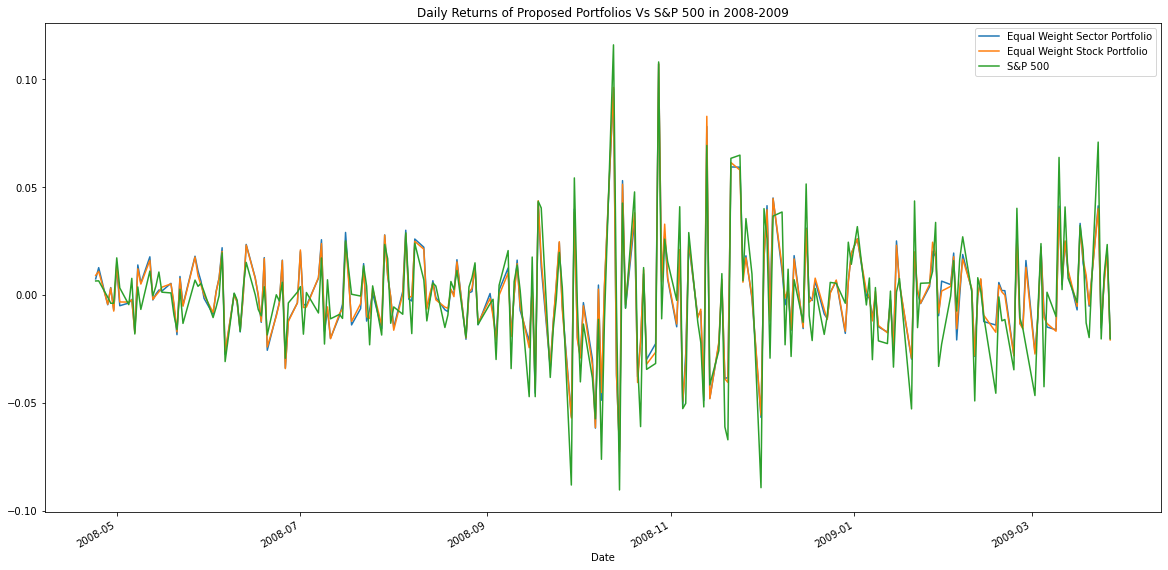

In [48]:
# plot daily returns of all portfolios
portfolio_comparisons_vs_sp500.plot(figsize=(20,10), title = "Daily Returns of Proposed Portfolios Vs S&P 500 in 2008-2009")

<AxesSubplot:title={'center':'Cumulative Returns of Proposed Portfolios Vs S&P 500 in 2008-2009'}, xlabel='Date'>

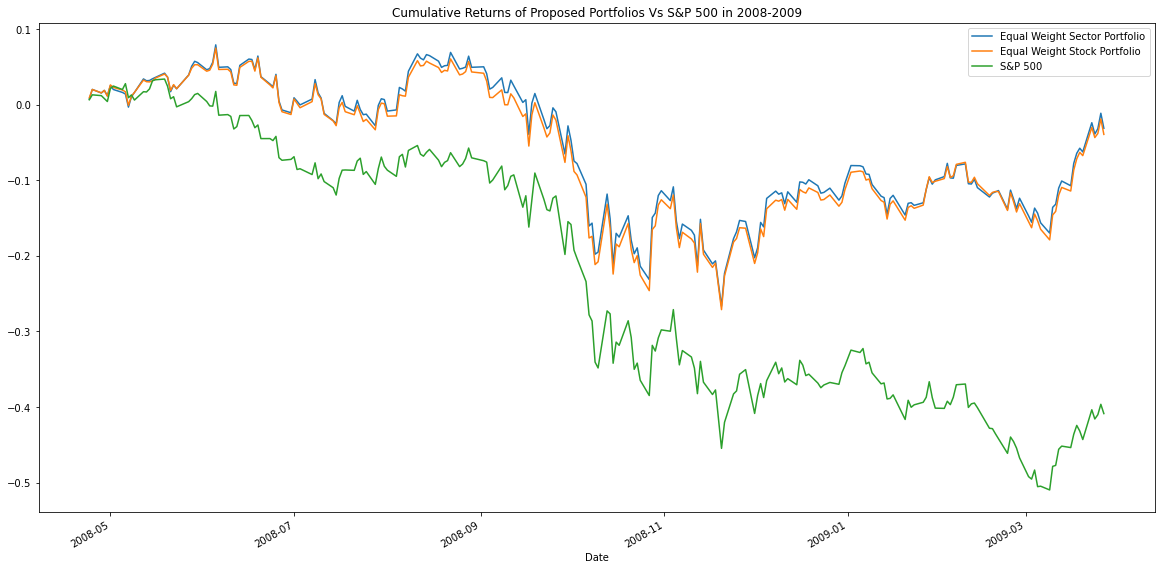

In [49]:
#calculate cumulative returns
cumulative_returns_2008 = (1 + portfolio_comparisons_vs_sp500).cumprod() - 1
cumulative_returns_2008.plot(figsize = (20,10), title = "Cumulative Returns of Proposed Portfolios Vs S&P 500 in 2008-2009")

<AxesSubplot:title={'center':'Risk Overview of Proposed Portfolios Vs S&P 500 in 2008-2009'}>

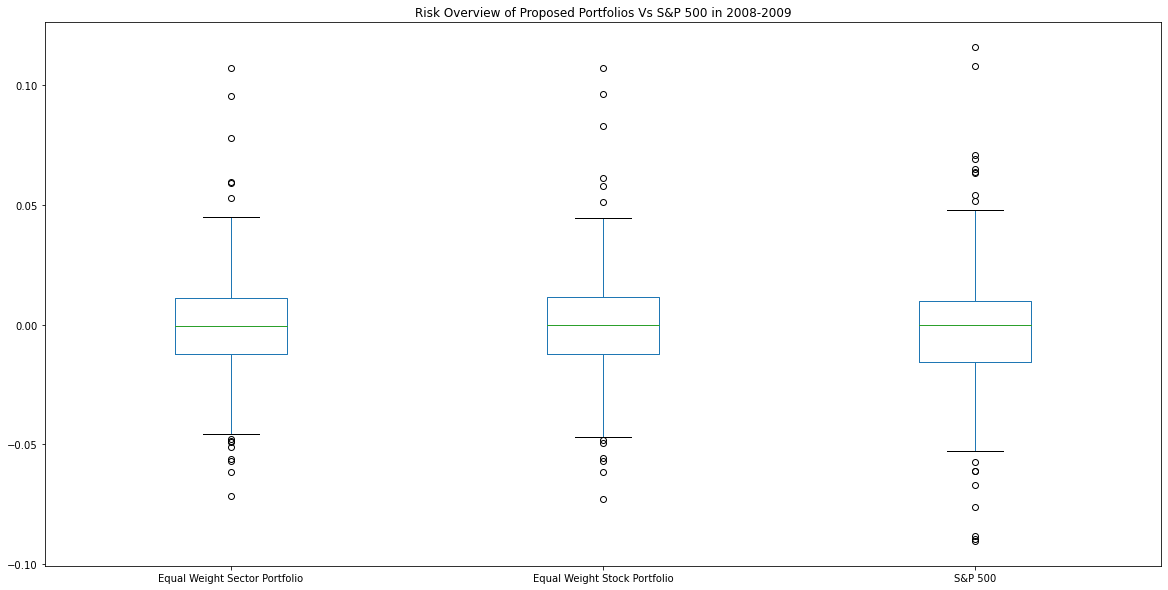

In [50]:
#display box plot of proposed portfolios and S&P 500 to visualize risk
portfolio_comparisons_vs_sp500.plot.box(figsize=(20,10), title = "Risk Overview of Proposed Portfolios Vs S&P 500 in 2008-2009")

In [51]:
# calculate the standard deviation of all portfolios
std_2008 = np.std(portfolio_comparisons_vs_sp500)
std_2008

Equal Weight Sector Portfolio    0.023240
Equal Weight Stock Portfolio     0.023240
S&P 500                          0.028604
dtype: float64

In [52]:
# determine which portfolios are riskier relative to the S&P 500 vith sort_values function
std_2008.sort_values(ascending = False)
print(std_2008)
print()
print("All portfolios that are above the S&P 500 standard deviation in the list above less risker investment options in 2008-2009.")

Equal Weight Sector Portfolio    0.023240
Equal Weight Stock Portfolio     0.023240
S&P 500                          0.028604
dtype: float64

All portfolios that are above the S&P 500 standard deviation in the list above less risker investment options in 2008-2009.


In [53]:
#calculate the annualized standard deviation over 252 trading days
annual_2008_std = std_2008 * np.sqrt(252)
annual_2008_std

Equal Weight Sector Portfolio    0.368925
Equal Weight Stock Portfolio     0.368926
S&P 500                          0.454077
dtype: float64

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation for Proposed Portfolios Vs S&P 500 in 2008-2009'}, xlabel='Date'>

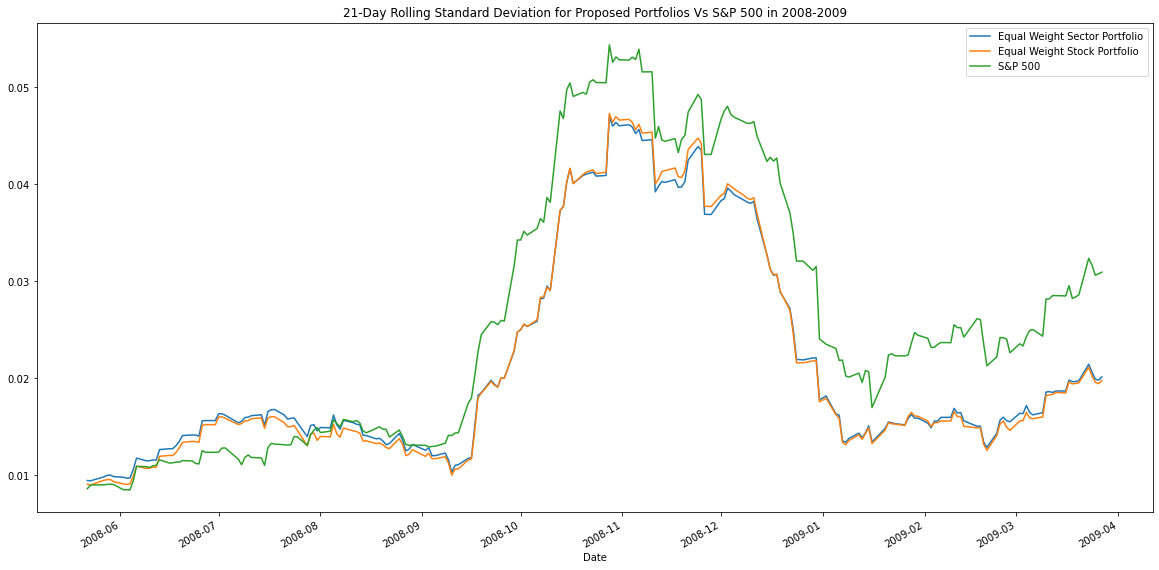

In [56]:
#calculate the rolling standard deviation for all portfolios and s&P 500 using 21-day window
rolling_std_2008 = portfolio_comparisons_vs_sp500.rolling(window=21).std()
rolling_std_2008.plot(figsize=(20,10), title = "21-Day Rolling Standard Deviation for Proposed Portfolios Vs S&P 500 in 2008-2009")

In [57]:
# calculate the correlation of the portfolios and S&P 500 index
correlation_2008 = portfolio_comparisons_vs_sp500.corr()
correlation_2008

,Equal Weight Sector Portfolio,Equal Weight Stock Portfolio,S&P 500
Equal Weight Sector Portfolio,1.000000,0.997256,0.907777
Equal Weight Stock Portfolio,0.997256,1.000000,0.914595
S&P 500,0.907777,0.914595,1.000000


The beta of the Equal Weight Sector Portfolio Strategy is 0.74 in 2008-2009.



<AxesSubplot:title={'center':'21-Day Rolling Beta of the Equal Weight Sector Portfolio in 2008-2009'}, xlabel='Date'>

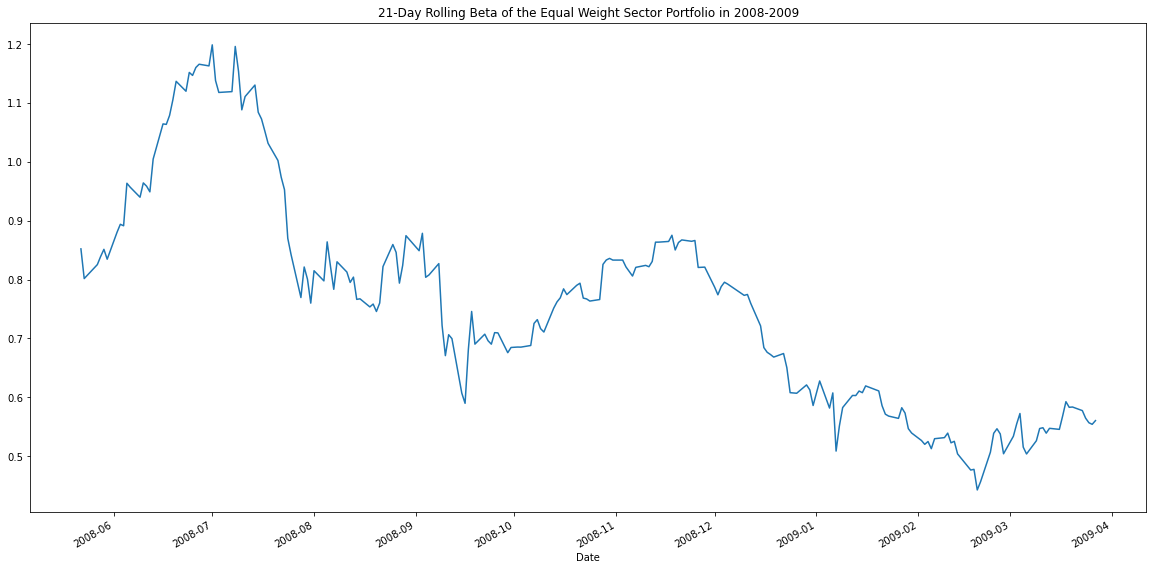

In [58]:
# calculate and plot the beta for the equal sector portfolio and the S&P 500
covar_equal_sector_2008 = portfolio_comparisons_vs_sp500["Equal Weight Sector Portfolio"].cov(portfolio_comparisons_vs_sp500["S&P 500"])
# solve variance for the S&P 500
var_sp500_2008 = portfolio_comparisons_vs_sp500["S&P 500"].var()
#solve beta
beta_equal_sector_2008 = round(covar_equal_sector_2008/var_sp500_2008, 2)
print(f"The beta of the Equal Weight Sector Portfolio Strategy is {beta_equal_sector_2008} in 2008-2009.")
print()
#plot the beta trend for the equal sector approach with 21-day rolling window
rolling_cov_equal_sector_2008 = portfolio_comparisons_vs_sp500["Equal Weight Sector Portfolio"].rolling(window=21).cov(portfolio_comparisons_vs_sp500["S&P 500"])
rolling_var_sp500_2008 = portfolio_comparisons_vs_sp500["S&P 500"].rolling(window=21).var()
rolling_beta_equal_sector_2008 = rolling_cov_equal_sector_2008/rolling_var_sp500_2008
rolling_beta_equal_sector_2008.plot(figsize=(20,10), title = "21-Day Rolling Beta of the Equal Weight Sector Portfolio in 2008-2009")

The beta of the Equal Weight Sector Portfolio Strategy is 0.74 in 2008-2009.



<AxesSubplot:title={'center':'21-Day Rolling Beta of the Equal Weight Stock Portfolio in 2008-2009'}, xlabel='Date'>

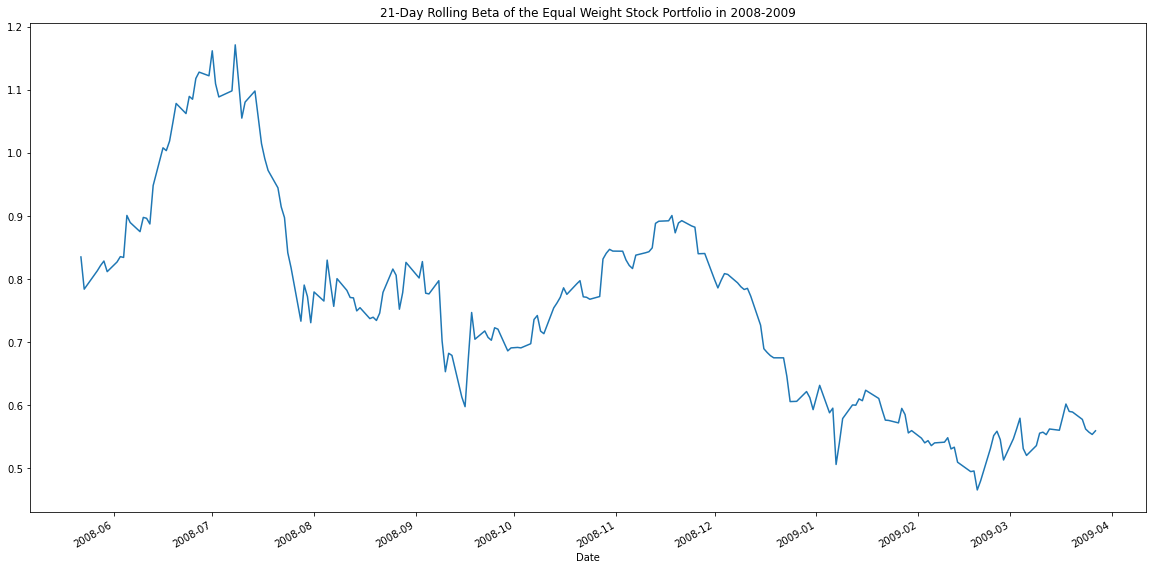

In [59]:
# calculate and plot the beta for the equal weight stock portfolio and the S&P 500
covar_equal_stock_2008 = portfolio_comparisons_vs_sp500["Equal Weight Stock Portfolio"].cov(portfolio_comparisons_vs_sp500["S&P 500"])
#solve beta
beta_equal_stock_2008 = round(covar_equal_stock_2008/var_sp500_2008, 2)
print(f"The beta of the Equal Weight Sector Portfolio Strategy is {beta_equal_stock_2008} in 2008-2009.")
print()
#plot the beta trend for the equal weight stock approach with 21-day rolling window
rolling_cov_equal_stock_2008 = portfolio_comparisons_vs_sp500["Equal Weight Stock Portfolio"].rolling(window=21).cov(portfolio_comparisons_vs_sp500["S&P 500"])
rolling_beta_equal_stock_2008 = rolling_cov_equal_stock_2008/rolling_var_sp500_2008
rolling_beta_equal_stock_2008.plot(figsize=(20,10), title = "21-Day Rolling Beta of the Equal Weight Stock Portfolio in 2008-2009")

In [60]:
# calculate the sharpe ratios to determine which portfolio will yield the best risk adjusted return
sharpe_ratios_2008 = (portfolio_comparisons_vs_sp500.mean() * 252) / annual_2008_std
sharpe_ratios_2008

Equal Weight Sector Portfolio    0.090271
Equal Weight Stock Portfolio     0.065720
S&P 500                         -1.017869
dtype: float64

<AxesSubplot:>

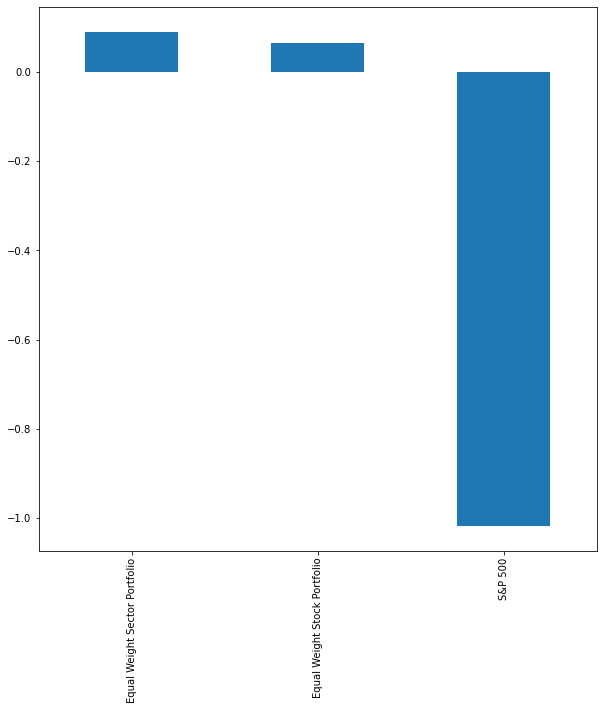

In [61]:
# plot sharpe ratios for 2008-2009 to better visualize
sharpe_ratios_2008.plot(kind = "bar", figsize=(10,10))

In [62]:
print("Given the analysis, during the recession caused by the financial crisis the best risk adjusted return would be best captured with the Equal Weight Sector Portfolio strategy.")

Given the analysis, during the recession caused by the financial crisis the best risk adjusted return would be best captured with the Equal Weight Sector Portfolio strategy.


In [64]:
# the recession driven by the financial crisis approximately lasted, 2 years. Run Monte Carlo Simulation over 2 year period to determine best case and worst case return
# concat full stock data for analysis and apply weight allocation proposed in the Equal Weight Sector Portfolio for the simulation

# load .env environment variables
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

# Format current date as ISO format
start_reference = pd.Timestamp("2008-03-29", tz="America/Toronto").isoformat()
end_reference = pd.Timestamp("2009-03-29", tz="America/Toronto").isoformat()
# Set the tickers
tickers = ["AWK", "NEE", "XEL", "COST", "WMT", "AMZN", "DLTR", "ORCL", "AAPL", "NFLX"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_2008_eql_weight_sector = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_reference,
    end = end_reference
).df

df_2008_eql_weight_sector.head()

AAPL                                      AMZN  \
                             open    high     low   close     volume   open   
time                                                                          
2008-11-03 00:00:00-05:00  15.126  15.586  14.980  15.279  253238591  56.35   
2008-11-04 00:00:00-05:00  15.711  15.970  15.239  15.836  333619042  57.18   
2008-11-05 00:00:00-05:00  15.571  15.674  14.713  14.751  305212818  57.47   
2008-11-06 00:00:00-05:00  14.443  14.683  14.000  14.164  317278908  49.80   
2008-11-07 00:00:00-05:00  14.167  14.264  13.674  14.030  265255139  47.85   

                                                          ...    WMT         \
                            high    low  close    volume  ...   open   high   
time                                                      ...                 
2008-11-03 00:00:00-05:00  57.25  55.02  55.77   5639130  ...  56.76  57.20   
2008-11-04 00:00:00-05:00  58.73  55.22  58.50   7194475  ...  56.80  57.25   
2008-11-05 00:00:00-05:00  58.00  51.62  51.98  10577184  ...  55.88  56.00   
2008-11-06 00:00:00-05:00  51.04  46.30  47.20  13495821  ...  55.58  56.35   
2008-11-07 00:00:00-05:00  49.79  47.01  49.21   7041054  ...  53.86  54.70   

                                                     XEL                       \
                             low  close    volume   open   high    low  close   
time                                                                            
2008-11-03 00:00:00-05:00  55.76  55.98  17949906  17.57  17.88  17.26  17.82   
2008-11-04 00:00:00-05:00  55.56  56.05  21632455  18.17  18.49  17.86  18.24   
2008-11-05 00:00:00-05:00  54.00  54.10  20308112  18.03  18.29  17.67  17.74   
2008-11-06 00:00:00-05:00  53.06  53.49  30268424  17.73  17.84  16.83  17.02   
2008-11-07 00:00:00-05:00  53.40  54.40  18018932  17.17  17.80  17.12  17.75   

                                    
                            volume  
time                                
2008-11-03 00:00:00-05:00  3082679  
2008-11-04 00:00:00-05:00  2401226  
2008-11-05 00:00:00-05:00  2684627  
2008-11-06 00:00:00-05:00  3024999  
2008-11-07 00:00:00-05:00  2988192  

[5 rows x 50 columns]

In [65]:
MC_2yrs_2008 = MCSimulation(
    portfolio_data=df_2008_eql_weight_sector,
    weights = [0.083,0.125,0.083,0.125,0.125,0.083,0.083,0.083,0.125,0.083],
    num_simulation = 500,
    num_trading_days = 252*2
)

In [66]:
# Printing the simulation input data
MC_2yrs_2008.portfolio_data.head()

AAPL                                     \
                             open    high     low   close     volume   
time                                                                   
2008-11-03 00:00:00-05:00  15.126  15.586  14.980  15.279  253238591   
2008-11-04 00:00:00-05:00  15.711  15.970  15.239  15.836  333619042   
2008-11-05 00:00:00-05:00  15.571  15.674  14.713  14.751  305212818   
2008-11-06 00:00:00-05:00  14.443  14.683  14.000  14.164  317278908   
2008-11-07 00:00:00-05:00  14.167  14.264  13.674  14.030  265255139   

                                         AMZN                       ...  \
                          daily_return   open   high    low  close  ...   
time                                                                ...   
2008-11-03 00:00:00-05:00          NaN  56.35  57.25  55.02  55.77  ...   
2008-11-04 00:00:00-05:00     0.036455  57.18  58.73  55.22  58.50  ...   
2008-11-05 00:00:00-05:00    -0.068515  57.47  58.00  51.62  51.98  ...   
2008-11-06 00:00:00-05:00    -0.039794  49.80  51.04  46.30  47.20  ...   
2008-11-07 00:00:00-05:00    -0.009461  47.85  49.79  47.01  49.21  ...   

                             WMT                                  XEL         \
                             low  close    volume daily_return   open   high   
time                                                                           
2008-11-03 00:00:00-05:00  55.76  55.98  17949906          NaN  17.57  17.88   
2008-11-04 00:00:00-05:00  55.56  56.05  21632455     0.001250  18.17  18.49   
2008-11-05 00:00:00-05:00  54.00  54.10  20308112    -0.034790  18.03  18.29   
2008-11-06 00:00:00-05:00  53.06  53.49  30268424    -0.011275  17.73  17.84   
2008-11-07 00:00:00-05:00  53.40  54.40  18018932     0.017013  17.17  17.80   

                                                               
                             low  close   volume daily_return  
time                                                           
2008-11-03 00:00:00-05:00  17.26  17.82  3082679          NaN  
2008-11-04 00:00:00-05:00  17.86  18.24  2401226     0.023569  
2008-11-05 00:00:00-05:00  17.67  17.74  2684627    -0.027412  
2008-11-06 00:00:00-05:00  16.83  17.02  3024999    -0.040586  
2008-11-07 00:00:00-05:00  17.12  17.75  2988192     0.042891  

[5 rows x 60 columns]

In [67]:
# Running a Monte Carlo simulation to forecast 2 years cumulative returns
MC_2yrs_2008.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
1,1.002072,1.156814,1.073647e+00,1.058921,1.029177e+00,9.973214e-01,1.033971,1.097090,0.967810,1.028216e+00,...,9.851264e-01,1.156447e+00,1.006903,1.015005,1.030523e+00,1.049428e+00,9.811653e-01,1.080442,8.346830e-01,0.869635
2,1.004296,1.258508,1.064322e+00,0.962443,1.075783e+00,1.191887e+00,0.985534,1.123193,1.023300,9.978345e-01,...,9.280871e-01,1.091970e+00,1.081245,1.124621,1.325322e+00,1.260063e+00,9.997958e-01,1.019144,6.987336e-01,0.894838
3,0.968127,1.338498,9.681015e-01,0.852251,1.113999e+00,1.325534e+00,1.146846,1.155807,1.149074,1.027071e+00,...,8.379494e-01,1.266429e+00,1.231705,1.344082,1.201494e+00,1.333325e+00,1.176970e+00,1.094140,7.308323e-01,1.027284
4,1.112640,1.201099,1.011159e+00,0.866127,8.871216e-01,1.209928e+00,1.346857,1.480968,1.457818,1.246815e+00,...,9.026456e-01,1.253593e+00,1.095384,1.354069,1.373289e+00,1.541535e+00,9.969425e-01,1.041747,6.748741e-01,1.024195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,104159.769788,666497.489547,1.045713e+06,50302.947824,2.855868e+07,3.099205e+06,96115.713235,112153.857911,59835.124160,3.466538e+07,...,1.877982e+06,3.336721e+06,48712.324220,442537.185072,2.056665e+07,1.620373e+06,7.696100e+07,192502.952051,5.795176e+07,647991.379254
501,96988.787234,806081.687084,1.087262e+06,58394.027282,3.135418e+07,2.904634e+06,107238.113836,114257.833172,54095.125331,3.399998e+07,...,1.798626e+06,3.702721e+06,50164.188677,536225.760450,2.295163e+07,1.763004e+06,6.552084e+07,178334.255169,6.542495e+07,588392.797483
502,86326.036583,856255.678281,9.241865e+05,65548.089740,2.948778e+07,2.926370e+06,127950.559891,142740.843699,48383.509268,3.420915e+07,...,2.262434e+06,3.619065e+06,46111.849644,590821.097686,2.515791e+07,1.648145e+06,6.360458e+07,213466.393590,6.807113e+07,634924.452508
503,89916.435211,797191.374700,1.211136e+06,78424.596522,3.684199e+07,2.959123e+06,124867.738235,167114.607513,42776.316591,3.094673e+07,...,2.116842e+06,4.148296e+06,45877.935552,615915.016090,2.808189e+07,1.404916e+06,7.037799e+07,220877.950461,6.993101e+07,711892.708377


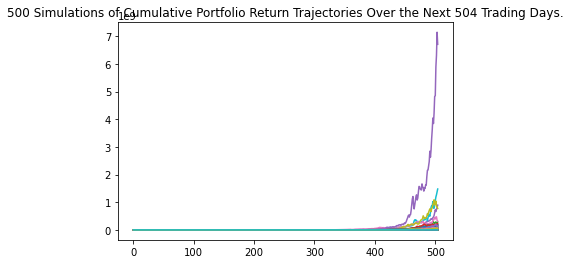

In [68]:
# Plot simulation outcomes
mc_sim_line_plot_eql_weight_sector_2008 = MC_2yrs_2008.plot_simulation()

# save plot for future use
mc_sim_line_plot_eql_weight_sector_2008.get_figure().savefig("MC_2yrs_sim_plot_eql_weight_sector_2008.png", bbox_inches="tight")

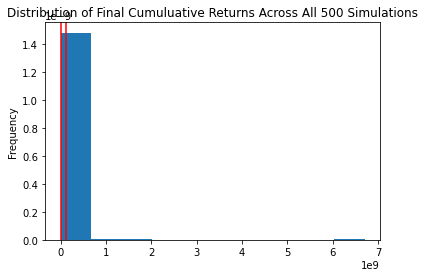

In [69]:
dist_plot_2008 = MC_2yrs_2008.plot_distribution()

# save plot for future use
dist_plot_2008.get_figure().savefig('MC_2yrs_dist_plot_2008.png',bbox_inches='tight')

In [71]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_sim_stats_2008 = MC_2yrs_2008.summarize_cumulative_return()

# Print summary statistics
print(mc_sim_stats_2008)

count           5.000000e+02
mean            2.993500e+07
std             3.121628e+08
min             2.166257e+02
25%             1.625853e+05
50%             9.283580e+05
75%             6.150266e+06
max             6.705324e+09
95% CI Lower    1.195460e+04
95% CI Upper    1.221275e+08
Name: 504, dtype: float64


In [72]:
# test future value of proposed strategy with initial investment of 10,000
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
ci_lower = round(mc_sim_stats_2008[8]*initial_investment,2)
ci_upper = round(mc_sim_stats_2008[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 2 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 2 years will end within in the range of $119546014.27 and $1221274841944.64


In [73]:
# re-run analysis for 2019-2020 outlook

def utilities_data_2020(index_number):

    ticker_data_2020 = get_data(utilities_tickers[index_number], start_date = "2019/09/11", end_date = "2020/09/11", index_as_date = True, interval = "1d")
    return ticker_data_2020

In [74]:
awk_2020 = utilities_data_2020(0)
awk_2020

,open,high,low,close,adjclose,volume,ticker
2019-09-11,120.650002,122.230003,119.500000,121.250000,118.481964,1160200,AWK
2019-09-12,122.459999,123.309998,121.370003,121.760002,118.980331,1267400,AWK
2019-09-13,121.500000,121.989998,120.709999,121.220001,118.452652,1052300,AWK
2019-09-16,121.800003,121.800003,120.410004,120.980003,118.218132,699200,AWK
2019-09-17,121.089996,122.230003,120.989998,121.760002,118.980331,1055000,AWK
...,...,...,...,...,...,...,...
2020-09-03,144.639999,146.300003,141.300003,142.479996,141.517517,717300,AWK
2020-09-04,142.699997,144.009995,141.630005,143.169998,142.202866,954200,AWK
2020-09-08,143.000000,143.210007,140.139999,140.770004,139.819077,771700,AWK
2020-09-09,142.020004,145.119995,142.020004,143.199997,142.232651,667600,AWK


In [75]:
nee_2020 = utilities_data_2020(1)
nee_2020

,open,high,low,close,adjclose,volume,ticker
2019-09-11,54.505001,55.147499,54.362499,55.014999,53.336761,8818000,NEE
2019-09-12,55.467499,55.562500,54.930000,55.185001,53.501583,8671200,NEE
2019-09-13,55.014999,55.029999,54.447498,54.622501,52.956238,8213200,NEE
2019-09-16,54.642502,54.770000,54.314999,54.577499,52.912613,5033600,NEE
2019-09-17,54.610001,55.582500,54.610001,55.555000,53.860294,7596800,NEE
...,...,...,...,...,...,...,...
2020-09-03,72.137497,72.772499,69.487503,70.147499,69.455620,7855200,NEE
2020-09-04,70.794998,71.500000,68.197502,69.330002,68.646187,7247600,NEE
2020-09-08,69.434998,70.207497,68.824997,69.477501,68.792229,7158000,NEE
2020-09-09,70.000000,71.705002,69.959999,70.592499,69.896225,4781600,NEE


In [76]:
xel_2020 = utilities_data_2020(2)
xel_2020

,open,high,low,close,adjclose,volume,ticker
2019-09-11,62.950001,63.730000,62.480000,63.250000,60.391350,3423000,XEL
2019-09-12,63.419998,63.849998,62.709999,63.070000,60.607559,3588300,XEL
2019-09-13,62.900002,63.290001,62.520000,62.610001,60.165520,2836300,XEL
2019-09-16,62.709999,63.020000,62.279999,62.830002,60.376938,5341300,XEL
2019-09-17,63.230000,63.930000,63.049999,63.730000,61.241795,4718200,XEL
...,...,...,...,...,...,...,...
2020-09-03,71.839996,72.430000,70.050003,70.650002,69.230736,2834000,XEL
2020-09-04,70.959999,71.230003,69.160004,70.019997,68.613396,2518800,XEL
2020-09-08,69.790001,70.010002,68.400002,69.110001,67.721687,2328000,XEL
2020-09-09,69.139999,71.349998,69.139999,70.589996,69.171944,2124400,XEL


In [77]:
xel_2020_df = xel_2020.reset_index()
xel_2020_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
xel_2020_df = xel_2020_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
xel_2020_df = xel_2020_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
xel_2020_df

Ticker,XEL
Date,
2019-09-11,60.391350
2019-09-12,60.607559
2019-09-13,60.165520
2019-09-16,60.376938
2019-09-17,61.241795
...,...
2020-09-03,69.230736
2020-09-04,68.613396
2020-09-08,67.721687


In [78]:
nee_2020_df =nee_2020.reset_index()
nee_2020_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
nee_2020_df = nee_2020_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
nee_2020_df = nee_2020_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
nee_2020_df

Ticker,NEE
Date,
2019-09-11,53.336761
2019-09-12,53.501583
2019-09-13,52.956238
2019-09-16,52.912613
2019-09-17,53.860294
...,...
2020-09-03,69.455620
2020-09-04,68.646187
2020-09-08,68.792229


In [79]:
awk_2020_df = awk_2020.reset_index()
awk_2020_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
awk_2020_df = awk_2020_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
awk_2020_df = awk_2020_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
awk_2020_df

Ticker,AWK
Date,
2019-09-11,118.481964
2019-09-12,118.980331
2019-09-13,118.452652
2019-09-16,118.218132
2019-09-17,118.980331
...,...
2020-09-03,141.517517
2020-09-04,142.202866
2020-09-08,139.819077


In [80]:
utilities2020_df = pd.concat([awk_2020_df,nee_2020_df,xel_2020_df], axis = "columns", join = "inner")
utilities2020_df

Ticker,AWK,NEE,XEL
Date,,,
2019-09-11,118.481964,53.336761,60.391350
2019-09-12,118.980331,53.501583,60.607559
2019-09-13,118.452652,52.956238,60.165520
2019-09-16,118.218132,52.912613,60.376938
2019-09-17,118.980331,53.860294,61.241795
...,...,...,...
2020-09-03,141.517517,69.455620,69.230736
2020-09-04,142.202866,68.646187,68.613396
2020-09-08,139.819077,68.792229,67.721687


In [81]:
def consumer_staples_2020(index_number):

    ticker_data = get_data(consumer_staples_tickers[index_number], start_date = "2019/09/11", end_date = "2020/09/11", index_as_date = True, interval = "1d")
    return ticker_data

In [82]:
cost_2020 = consumer_staples_2020(0)
cost_2020

,open,high,low,close,adjclose,volume,ticker
2019-09-11,294.299988,295.739990,287.809998,290.690002,279.723450,4754700,COST
2019-09-12,290.339996,292.750000,288.679993,289.890015,278.953644,2942600,COST
2019-09-13,290.200012,294.070007,289.850006,291.899994,280.887787,2306300,COST
2019-09-16,290.570007,291.380005,288.339996,288.690002,277.798859,1508900,COST
2019-09-17,289.559998,291.790009,288.690002,291.410004,280.416290,1758900,COST
...,...,...,...,...,...,...,...
2020-09-03,363.070007,363.670013,345.519989,348.299988,338.091003,3630400,COST
2020-09-04,353.980011,353.980011,340.399994,346.570007,336.411743,2557000,COST
2020-09-08,343.839996,344.920013,338.179993,338.859985,328.927704,2144300,COST
2020-09-09,340.899994,349.700012,340.390015,346.429993,336.275818,2100900,COST


In [83]:
wmt_2020 = consumer_staples_2020(1)
wmt_2020

,open,high,low,close,adjclose,volume,ticker
2019-09-11,116.000000,116.699997,115.220001,116.019997,113.605461,5284100,WMT
2019-09-12,116.650002,117.070000,115.900002,116.919998,114.486732,4474300,WMT
2019-09-13,117.160004,118.190002,116.949997,117.430000,114.986122,5638600,WMT
2019-09-16,116.540001,117.169998,115.379997,115.570000,113.164825,6090300,WMT
2019-09-17,115.320000,116.690002,115.250000,116.510002,114.085274,4604500,WMT
...,...,...,...,...,...,...,...
2020-09-03,146.699997,149.600006,141.809998,144.539993,144.013580,16005000,WMT
2020-09-04,144.020004,145.039993,140.100006,142.830002,142.309814,11327400,WMT
2020-09-08,141.410004,141.899994,138.259995,138.449997,137.945755,11322300,WMT
2020-09-09,140.089996,142.610001,139.449997,139.889999,139.380524,11223000,WMT


In [84]:
wmt_2020_df = wmt_2020.reset_index()
wmt_2020_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
wmt_2020_df = wmt_2020_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
wmt_2020_df = wmt_2020_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
wmt_2020_df

Ticker,WMT
Date,
2019-09-11,113.605461
2019-09-12,114.486732
2019-09-13,114.986122
2019-09-16,113.164825
2019-09-17,114.085274
...,...
2020-09-03,144.013580
2020-09-04,142.309814
2020-09-08,137.945755


In [85]:
cost_2020_df = cost_2020.reset_index()
cost_2020_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
cost_2020_df = cost_2020_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
cost_2020_df = cost_2020_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
cost_2020_df

Ticker,COST
Date,
2019-09-11,279.723450
2019-09-12,278.953644
2019-09-13,280.887787
2019-09-16,277.798859
2019-09-17,280.416290
...,...
2020-09-03,338.091003
2020-09-04,336.411743
2020-09-08,328.927704


In [86]:
consumer_staples2020_df = pd.concat([cost_2020_df,wmt_2020_df], axis = "columns", join = "inner")
consumer_staples2020_df

Ticker,COST,WMT
Date,,
2019-09-11,279.723450,113.605461
2019-09-12,278.953644,114.486732
2019-09-13,280.887787,114.986122
2019-09-16,277.798859,113.164825
2019-09-17,280.416290,114.085274
...,...,...
2020-09-03,338.091003,144.013580
2020-09-04,336.411743,142.309814
2020-09-08,328.927704,137.945755


In [87]:
def consumer_discretionary_2020(index_number):

    ticker_data = get_data(consumer_disc_ticker[index_number], start_date = "2019/09/11", end_date = "2020/09/11", index_as_date = True, interval = "1d")
    return ticker_data

In [88]:
amzn_2020 = consumer_discretionary_2020(0)
amzn_2020

,open,high,low,close,adjclose,volume,ticker
2019-09-11,1812.140015,1833.420044,1809.079956,1822.989990,1822.989990,2432800,AMZN
2019-09-12,1837.630005,1853.660034,1834.280029,1843.550049,1843.550049,2823500,AMZN
2019-09-13,1842.010010,1846.119995,1835.170044,1839.339966,1839.339966,1971300,AMZN
2019-09-16,1824.020020,1825.689941,1800.199951,1807.839966,1807.839966,3675500,AMZN
2019-09-17,1807.079956,1823.989990,1804.099976,1822.550049,1822.550049,1982400,AMZN
...,...,...,...,...,...,...,...
2020-09-03,3485.000000,3488.409912,3303.000000,3368.000000,3368.000000,8161100,AMZN
2020-09-04,3318.000000,3381.500000,3111.129883,3294.620117,3294.620117,8781800,AMZN
2020-09-08,3144.000000,3250.850098,3130.000000,3149.840088,3149.840088,6094200,AMZN
2020-09-09,3202.989990,3303.179932,3185.000000,3268.610107,3268.610107,5188700,AMZN


In [89]:
dltr_2020 = consumer_discretionary_2020(1)
dltr_2020

,open,high,low,close,adjclose,volume,ticker
2019-09-11,111.019997,112.650002,110.419998,111.360001,111.360001,3242900,DLTR
2019-09-12,111.830002,112.910004,111.010002,111.940002,111.940002,1549900,DLTR
2019-09-13,111.889999,113.120003,111.510002,112.860001,112.860001,1801600,DLTR
2019-09-16,112.099998,112.139999,109.510002,109.559998,109.559998,1746600,DLTR
2019-09-17,109.739998,111.099998,109.250000,111.040001,111.040001,1220900,DLTR
...,...,...,...,...,...,...,...
2020-09-03,94.959999,95.459999,92.430000,92.919998,92.919998,2215000,DLTR
2020-09-04,93.320000,93.320000,90.050003,91.230003,91.230003,2561500,DLTR
2020-09-08,90.580002,90.949997,88.589996,89.830002,89.830002,2926200,DLTR
2020-09-09,89.650002,92.519997,89.349998,91.809998,91.809998,2383700,DLTR


In [90]:
amzn_2020_df = amzn_2020.reset_index()
amzn_2020_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
amzn_2020_df = amzn_2020_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
amzn_2020_df = amzn_2020_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
amzn_2020_df

Ticker,AMZN
Date,
2019-09-11,1822.989990
2019-09-12,1843.550049
2019-09-13,1839.339966
2019-09-16,1807.839966
2019-09-17,1822.550049
...,...
2020-09-03,3368.000000
2020-09-04,3294.620117
2020-09-08,3149.840088


In [91]:
dltr_2020_df = dltr_2020.reset_index()
dltr_2020_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
dltr_2020_df = dltr_2020_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
dltr_2020_df = dltr_2020_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
dltr_2020_df

Ticker,DLTR
Date,
2019-09-11,111.360001
2019-09-12,111.940002
2019-09-13,112.860001
2019-09-16,109.559998
2019-09-17,111.040001
...,...
2020-09-03,92.919998
2020-09-04,91.230003
2020-09-08,89.830002


In [92]:
consumer_disc2020_df = pd.concat([amzn_2020_df,dltr_2020_df], axis = "columns", join = "inner")
consumer_disc2020_df

Ticker,AMZN,DLTR
Date,,
2019-09-11,1822.989990,111.360001
2019-09-12,1843.550049,111.940002
2019-09-13,1839.339966,112.860001
2019-09-16,1807.839966,109.559998
2019-09-17,1822.550049,111.040001
...,...,...
2020-09-03,3368.000000,92.919998
2020-09-04,3294.620117,91.230003
2020-09-08,3149.840088,89.830002


In [93]:
def tech_data_2020(index_number):

    ticker_data = get_data(tech_tickers[index_number], start_date = "2019/09/11", end_date = "2020/09/11", index_as_date = True, interval = "1d")
    return ticker_data

In [94]:
orcl_2020 = tech_data_2020(0)
orcl_2020

,open,high,low,close,adjclose,volume,ticker
2019-09-11,55.270000,56.290001,55.160000,56.290001,54.861244,16749400,ORCL
2019-09-12,54.340000,54.880001,52.900002,53.889999,52.522163,28184400,ORCL
2019-09-13,54.000000,54.720001,53.330002,53.750000,52.385715,14736700,ORCL
2019-09-16,53.400002,53.570000,52.790001,53.139999,51.791203,15204200,ORCL
2019-09-17,53.180000,53.200001,52.349998,52.869999,51.528053,11111400,ORCL
...,...,...,...,...,...,...,...
2020-09-03,58.720001,58.990002,56.650002,57.099998,56.652935,15387400,ORCL
2020-09-04,56.880001,57.270000,55.160000,55.730000,55.293663,14697200,ORCL
2020-09-08,55.349998,55.790001,54.869999,55.320000,54.886871,16472800,ORCL
2020-09-09,56.160000,57.400002,55.860001,56.950001,56.504112,13993200,ORCL


In [95]:
aapl_2020 = tech_data_2020(1)
aapl_2020

,open,high,low,close,adjclose,volume,ticker
2019-09-11,54.517502,55.927502,54.432499,55.897499,55.170570,177158400,AAPL
2019-09-12,56.200001,56.605000,55.715000,55.772499,55.047195,128906800,AAPL
2019-09-13,55.000000,55.197498,54.255001,54.687500,53.976303,159053200,AAPL
2019-09-16,54.432499,55.032501,54.389999,54.974998,54.260071,84632400,AAPL
2019-09-17,54.990002,55.205002,54.779999,55.174999,54.457470,73274800,AAPL
...,...,...,...,...,...,...,...
2020-09-03,126.910004,128.839996,120.500000,120.879997,120.491753,257599600,AAPL
2020-09-04,120.070000,123.699997,110.889999,120.959999,120.571503,332607200,AAPL
2020-09-08,113.949997,118.989998,112.680000,112.820000,112.457649,231366600,AAPL
2020-09-09,117.260002,119.139999,115.260002,117.320000,116.943192,176940500,AAPL


In [96]:
nflx_2020 = tech_data_2020(2)
nflx_2020

,open,high,low,close,adjclose,volume,ticker
2019-09-11,285.700012,292.649994,284.609985,288.269989,288.269989,7405900,NFLX
2019-09-12,288.100006,292.730011,286.600006,288.859985,288.859985,5010900,NFLX
2019-09-13,290.609985,296.619995,290.040009,294.149994,294.149994,6583100,NFLX
2019-09-16,294.230011,297.429993,289.779999,294.290009,294.290009,5307400,NFLX
2019-09-17,294.500000,299.149994,291.790009,298.600006,298.600006,4777100,NFLX
...,...,...,...,...,...,...,...
2020-09-03,545.000000,554.000000,521.320007,525.750000,525.750000,9071100,NFLX
2020-09-04,520.179993,527.359985,485.980011,516.049988,516.049988,8270100,NFLX
2020-09-08,498.399994,522.000000,495.000000,507.019989,507.019989,5572700,NFLX
2020-09-09,519.210022,520.000000,492.570007,500.190002,500.190002,6848100,NFLX


In [97]:
orcl_2020_df = orcl_2020.reset_index()
orcl_2020_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
orcl_2020_df = orcl_2020_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
orcl_2020_df = orcl_2020_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
orcl_2020_df

Ticker,ORCL
Date,
2019-09-11,54.861244
2019-09-12,52.522163
2019-09-13,52.385715
2019-09-16,51.791203
2019-09-17,51.528053
...,...
2020-09-03,56.652935
2020-09-04,55.293663
2020-09-08,54.886871


In [98]:
aapl_2020_df = aapl_2020.reset_index()
aapl_2020_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
aapl_2020_df = aapl_2020_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
aapl_2020_df = aapl_2020_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
aapl_2020_df

Ticker,AAPL
Date,
2019-09-11,55.170570
2019-09-12,55.047195
2019-09-13,53.976303
2019-09-16,54.260071
2019-09-17,54.457470
...,...
2020-09-03,120.491753
2020-09-04,120.571503
2020-09-08,112.457649


In [99]:
nflx_2020_df = nflx_2020.reset_index()
nflx_2020_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
nflx_2020_df = nflx_2020_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
nflx_2020_df = nflx_2020_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
nflx_2020_df

Ticker,NFLX
Date,
2019-09-11,288.269989
2019-09-12,288.859985
2019-09-13,294.149994
2019-09-16,294.290009
2019-09-17,298.600006
...,...
2020-09-03,525.750000
2020-09-04,516.049988
2020-09-08,507.019989


In [100]:
tech2020_df = pd.concat([orcl_2020_df,aapl_2020_df,nflx_2020_df], axis = "columns", join = "inner")
tech2020_df

Ticker,ORCL,AAPL,NFLX
Date,,,
2019-09-11,54.861244,55.170570,288.269989
2019-09-12,52.522163,55.047195,288.859985
2019-09-13,52.385715,53.976303,294.149994
2019-09-16,51.791203,54.260071,294.290009
2019-09-17,51.528053,54.457470,298.600006
...,...,...,...
2020-09-03,56.652935,120.491753,525.750000
2020-09-04,55.293663,120.571503,516.049988
2020-09-08,54.886871,112.457649,507.019989


In [101]:
utilities2020_daily_returns = utilities2020_df.pct_change()
utilities2020_daily_returns.dropna(inplace = True)
utilities2020_daily_returns

Ticker,AWK,NEE,XEL
Date,,,
2019-09-12,0.004206,0.003090,0.003580
2019-09-13,-0.004435,-0.010193,-0.007293
2019-09-16,-0.001980,-0.000824,0.003514
2019-09-17,0.006447,0.017910,0.014324
2019-09-18,-0.001971,0.007560,0.004394
...,...,...,...
2020-09-03,-0.011585,-0.026608,-0.012579
2020-09-04,0.004843,-0.011654,-0.008917
2020-09-08,-0.016763,0.002127,-0.012996


In [102]:
consumer_staples2020_daily_returns = consumer_staples2020_df.pct_change()
consumer_staples2020_daily_returns.dropna(inplace = True)
consumer_staples2020_daily_returns

Ticker,COST,WMT
Date,,
2019-09-12,-0.002752,0.007757
2019-09-13,0.006934,0.004362
2019-09-16,-0.010997,-0.015839
2019-09-17,0.009422,0.008134
2019-09-18,0.003500,0.005579
...,...,...
2020-09-03,-0.029427,-0.021262
2020-09-04,-0.004967,-0.011831
2020-09-08,-0.022247,-0.030666


In [103]:
consumer_disc2020_daily_returns = consumer_disc2020_df.pct_change()
consumer_disc2020_daily_returns.dropna(inplace = True)
consumer_disc2020_daily_returns

Ticker,AMZN,DLTR
Date,,
2019-09-12,0.011278,0.005208
2019-09-13,-0.002284,0.008219
2019-09-16,-0.017126,-0.029240
2019-09-17,0.008137,0.013509
2019-09-18,-0.002793,0.010987
...,...,...
2020-09-03,-0.046284,-0.018796
2020-09-04,-0.021787,-0.018188
2020-09-08,-0.043944,-0.015346


In [104]:
tech2020_daily_returns = tech2020_df.pct_change()
tech2020_daily_returns.dropna(inplace = True)
tech2020_daily_returns

Ticker,ORCL,AAPL,NFLX
Date,,,
2019-09-12,-0.042636,-0.002236,0.002047
2019-09-13,-0.002598,-0.019454,0.018313
2019-09-16,-0.011349,0.005257,0.000476
2019-09-17,-0.005081,0.003638,0.014645
2019-09-18,-0.005863,0.009379,-0.023577
...,...,...,...
2020-09-03,-0.032695,-0.080061,-0.049002
2020-09-04,-0.023993,0.000662,-0.018450
2020-09-08,-0.007357,-0.067295,-0.017498


In [105]:
combined_ticker_df_2020 = pd.concat([utilities2020_daily_returns,consumer_staples2020_daily_returns,consumer_disc2020_daily_returns,tech2020_daily_returns], axis = "columns", join = "inner")
combined_ticker_df_2020

Ticker,AWK,NEE,XEL,COST,WMT,AMZN,DLTR,ORCL,AAPL,NFLX
Date,,,,,,,,,,
2019-09-12,0.004206,0.003090,0.003580,-0.002752,0.007757,0.011278,0.005208,-0.042636,-0.002236,0.002047
2019-09-13,-0.004435,-0.010193,-0.007293,0.006934,0.004362,-0.002284,0.008219,-0.002598,-0.019454,0.018313
2019-09-16,-0.001980,-0.000824,0.003514,-0.010997,-0.015839,-0.017126,-0.029240,-0.011349,0.005257,0.000476
2019-09-17,0.006447,0.017910,0.014324,0.009422,0.008134,0.008137,0.013509,-0.005081,0.003638,0.014645
2019-09-18,-0.001971,0.007560,0.004394,0.003500,0.005579,-0.002793,0.010987,-0.005863,0.009379,-0.023577
...,...,...,...,...,...,...,...,...,...,...
2020-09-03,-0.011585,-0.026608,-0.012579,-0.029427,-0.021262,-0.046284,-0.018796,-0.032695,-0.080061,-0.049002
2020-09-04,0.004843,-0.011654,-0.008917,-0.004967,-0.011831,-0.021787,-0.018188,-0.023993,0.000662,-0.018450
2020-09-08,-0.016763,0.002127,-0.012996,-0.022247,-0.030666,-0.043944,-0.015346,-0.007357,-0.067295,-0.017498


In [106]:
equal_sector_return_2020 = combined_ticker_df_2020.dot(equal_sector_weights)
equal_sector_return_2020.head()

Date
2019-09-12    0.000024
2019-09-13    0.000015
2019-09-16   -0.009559
2019-09-17    0.009224
2019-09-18    0.001319
dtype: float64

In [107]:
equal_weight_stock_return_2020 = combined_ticker_df_2020.dot(equal_stock_weights)
equal_weight_stock_return_2020.head()

Date
2019-09-12   -0.001046
2019-09-13   -0.000843
2019-09-16   -0.007811
2019-09-17    0.009109
2019-09-18    0.000719
dtype: float64

In [108]:
portfolio_comparison_df_2020 = pd.concat([equal_sector_return_2020, equal_weight_stock_return_2020], axis = "columns", join = "inner")
portfolio_comparison_df_2020.columns = ["Equal Weight Sector Portfolio","Equal Weight Stock Portfolio"]
portfolio_comparison_df_2020.head()

,Equal Weight Sector Portfolio,Equal Weight Stock Portfolio
Date,,
2019-09-12,0.000024,-0.001046
2019-09-13,0.000015,-0.000843
2019-09-16,-0.009559,-0.007811
2019-09-17,0.009224,0.009109
2019-09-18,0.001319,0.000719


In [109]:
sp500_data_2020 = get_data("^GSPC", start_date = "2019/09/11", end_date = "2020/09/11", index_as_date = True, interval = "1d")
sp500_2020_df = sp500_data_2020.reset_index()
sp500_2020_df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Ticker"]
sp500_2020_df = sp500_2020_df.drop(["Open", "High","Low","Close","Volume"], axis=1)
sp500_2020_df = sp500_2020_df.pivot_table(values = "Adj Close", index = "Date", columns = "Ticker")
sp500_2020_df.columns = ["S&P 500"]
sp500_2020_df.head()

,S&P 500
Date,
2019-09-11,3000.929932
2019-09-12,3009.570068
2019-09-13,3007.389893
2019-09-16,2997.959961
2019-09-17,3005.699951


In [110]:
sp500_2020_daily_returns = sp500_2020_df.pct_change()
sp500_2020_daily_returns.dropna(inplace = True)
sp500_2020_daily_returns

,S&P 500
Date,
2019-09-12,0.002879
2019-09-13,-0.000724
2019-09-16,-0.003136
2019-09-17,0.002582
2019-09-18,0.000343
...,...
2020-09-03,-0.035126
2020-09-04,-0.008133
2020-09-08,-0.027756


In [111]:
portfolio_comparisons_vs_sp500_2020 = portfolio_comparison_df_2020
portfolio_comparisons_vs_sp500_2020["S&P 500"] = sp500_2020_daily_returns
portfolio_comparisons_vs_sp500_2020

,Equal Weight Sector Portfolio,Equal Weight Stock Portfolio,S&P 500
Date,,,
2019-09-12,0.000024,-0.001046,0.002879
2019-09-13,0.000015,-0.000843,-0.000724
2019-09-16,-0.009559,-0.007811,-0.003136
2019-09-17,0.009224,0.009109,0.002582
2019-09-18,0.001319,0.000719,0.000343
...,...,...,...
2020-09-03,-0.032182,-0.032830,-0.035126
2020-09-04,-0.011889,-0.011428,-0.008133
2020-09-08,-0.024007,-0.023198,-0.027756


<AxesSubplot:title={'center':'Daily Returns of Proposed Portfolios Vs S&P 500 in 2019-2020'}, xlabel='Date'>

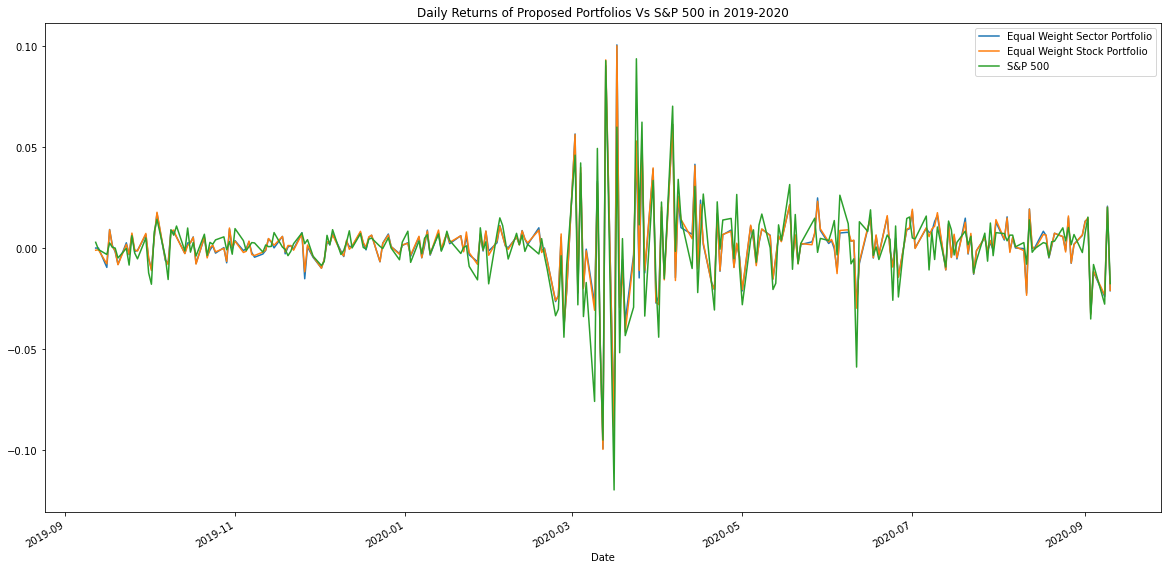

In [112]:
# plot daily returns of all portfolios
portfolio_comparisons_vs_sp500_2020.plot(figsize=(20,10), title = "Daily Returns of Proposed Portfolios Vs S&P 500 in 2019-2020")

<AxesSubplot:title={'center':'Cumulative Returns of Proposed Portfolios Vs S&P 500 in 2019-2020'}, xlabel='Date'>

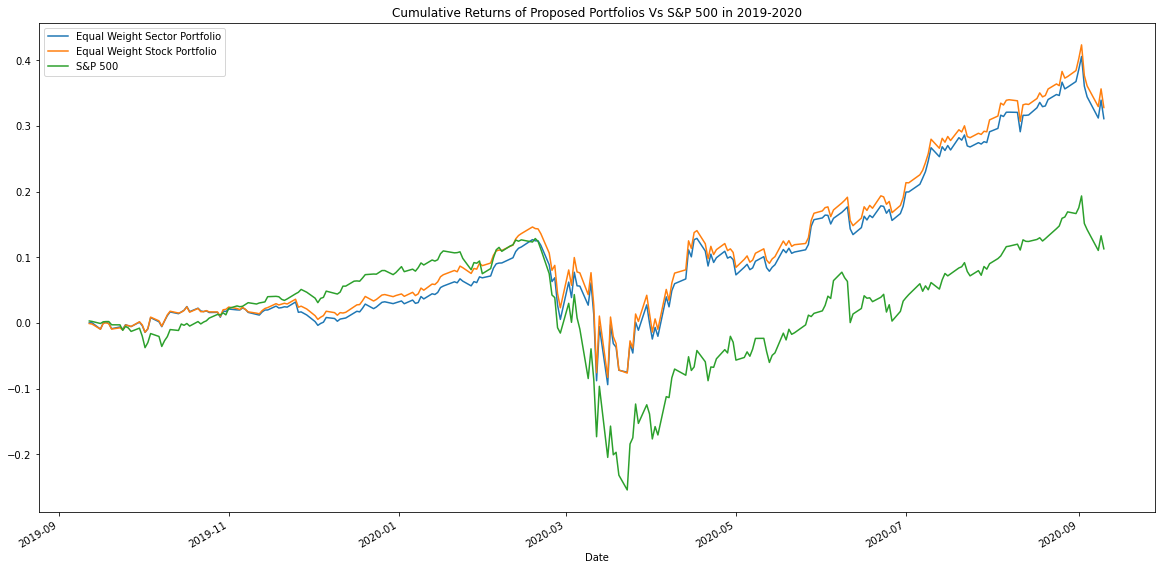

In [113]:
#calculate cumulative returns
cumulative_returns_2020 = (1 + portfolio_comparisons_vs_sp500_2020).cumprod() - 1
cumulative_returns_2020.plot(figsize = (20,10), title = "Cumulative Returns of Proposed Portfolios Vs S&P 500 in 2019-2020")

<AxesSubplot:title={'center':'Risk Overview of Proposed Portfolios Vs S&P 500 in 2019-2020'}>

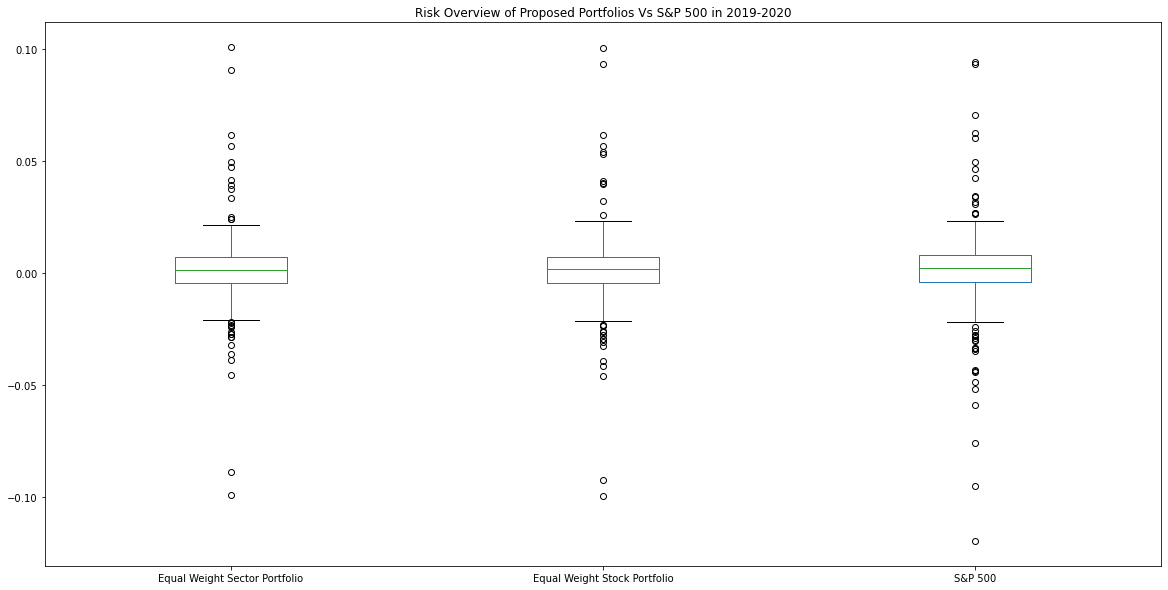

In [114]:
#display box plot of proposed portfolios and S&P 500 to visualize risk
portfolio_comparisons_vs_sp500_2020.plot.box(figsize=(20,10), title = "Risk Overview of Proposed Portfolios Vs S&P 500 in 2019-2020")

In [115]:
# calculate the standard deviation of all portfolios
std_2020 = np.std(portfolio_comparisons_vs_sp500_2020)
std_2020

Equal Weight Sector Portfolio    0.018035
Equal Weight Stock Portfolio     0.018445
S&P 500                          0.021128
dtype: float64

In [116]:
std_2020.sort_values(ascending = False)
print(std_2020)
print()
print("All portfolios that are above the S&P 500 standard deviation in the list above less risker investment options in 2019-2020.")

Equal Weight Sector Portfolio    0.018035
Equal Weight Stock Portfolio     0.018445
S&P 500                          0.021128
dtype: float64

All portfolios that are above the S&P 500 standard deviation in the list above less risker investment options in 2019-2020.


In [117]:
#calculate the annualized standard deviation over 252 trading days
annual_2020_std = std_2020 * np.sqrt(252)
annual_2020_std

Equal Weight Sector Portfolio    0.286304
Equal Weight Stock Portfolio     0.292809
S&P 500                          0.335403
dtype: float64

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation for Proposed Portfolios Vs S&P 500 in 2019-2020'}, xlabel='Date'>

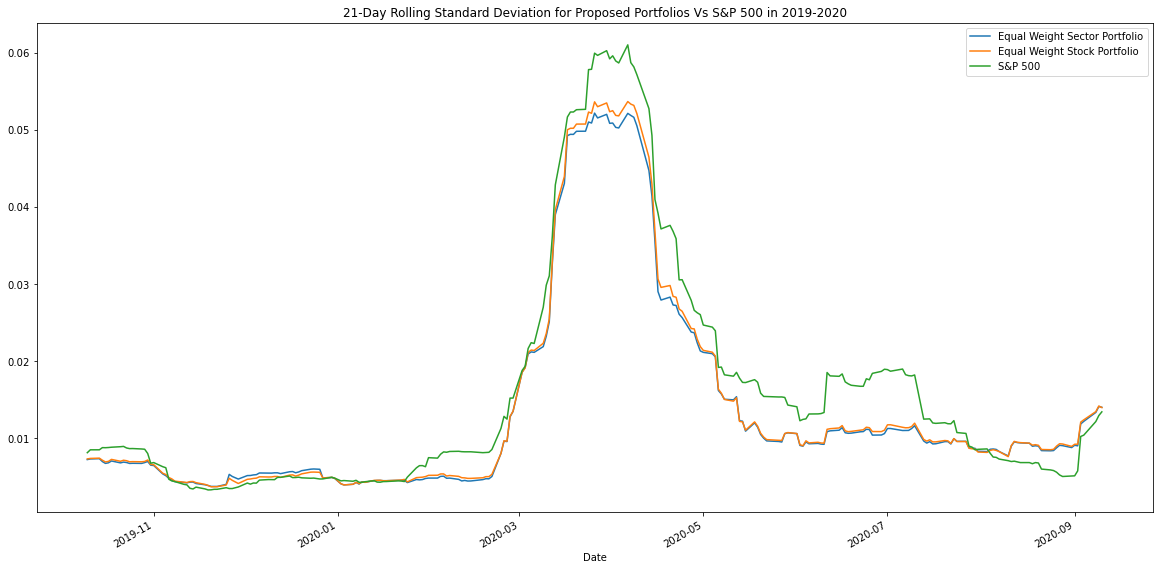

In [118]:
# calculate the rolling standard deviation for all portfolios and s&P 500 using 21-day window
rolling_std_2020 = portfolio_comparisons_vs_sp500_2020.rolling(window=21).std()
rolling_std_2020.plot(figsize=(20,10), title = "21-Day Rolling Standard Deviation for Proposed Portfolios Vs S&P 500 in 2019-2020")

In [119]:
# calculate the correlation of the portfolios and S&P 500 index
correlation_2020 = portfolio_comparisons_vs_sp500_2020.corr()
correlation_2020

,Equal Weight Sector Portfolio,Equal Weight Stock Portfolio,S&P 500
Equal Weight Sector Portfolio,1.000000,0.998044,0.887968
Equal Weight Stock Portfolio,0.998044,1.000000,0.899350
S&P 500,0.887968,0.899350,1.000000


The beta of the Equal Weight Sector Portfolio Strategy is 0.76 in 2019-2020.



<AxesSubplot:title={'center':'21-Day Rolling Beta of the Equal Weight Sector Portfolio in 2019-2020'}, xlabel='Date'>

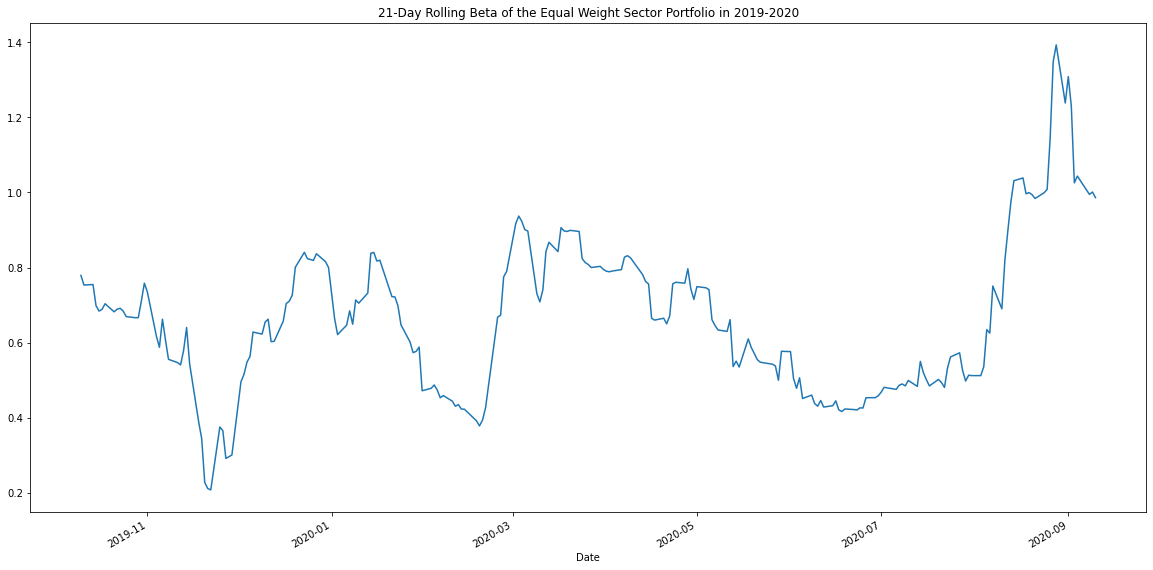

In [120]:
# calculate and plot the beta for the equal sector portfolio and the S&P 500
covar_equal_sector_2020 = portfolio_comparisons_vs_sp500_2020["Equal Weight Sector Portfolio"].cov(portfolio_comparisons_vs_sp500_2020["S&P 500"])
# solve variance for the S&P 500
var_sp500_2020 = portfolio_comparisons_vs_sp500_2020["S&P 500"].var()
#solve beta
beta_equal_sector_2020 = round(covar_equal_sector_2020/var_sp500_2020, 2)
print(f"The beta of the Equal Weight Sector Portfolio Strategy is {beta_equal_sector_2020} in 2019-2020.")
print()
#plot the beta trend for the equal sector approach with 21-day rolling window
rolling_cov_equal_sector_2020 = portfolio_comparisons_vs_sp500_2020["Equal Weight Sector Portfolio"].rolling(window=21).cov(portfolio_comparisons_vs_sp500_2020["S&P 500"])
rolling_var_sp500_2020 = portfolio_comparisons_vs_sp500_2020["S&P 500"].rolling(window=21).var()
rolling_beta_equal_sector_2020 = rolling_cov_equal_sector_2020/rolling_var_sp500_2020
rolling_beta_equal_sector_2020.plot(figsize=(20,10), title = "21-Day Rolling Beta of the Equal Weight Sector Portfolio in 2019-2020")

The beta of the Equal Weight Sector Portfolio Strategy is 0.79 in 2019-2020.



<AxesSubplot:title={'center':'21-Day Rolling Beta of the Equal Weight Stock Portfolio in 2019-2020'}, xlabel='Date'>

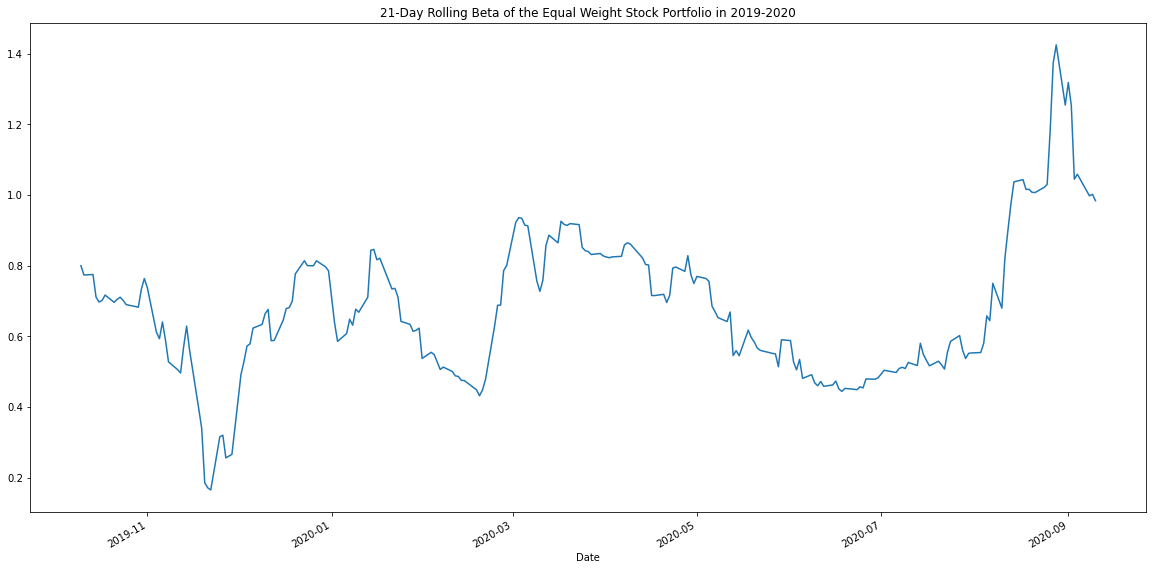

In [121]:
# calculate and plot the beta for the equal weight stock portfolio and the S&P 500
covar_equal_stock_2020 = portfolio_comparisons_vs_sp500_2020["Equal Weight Stock Portfolio"].cov(portfolio_comparisons_vs_sp500_2020["S&P 500"])
#solve beta
beta_equal_stock_2020 = round(covar_equal_stock_2020/var_sp500_2020, 2)
print(f"The beta of the Equal Weight Sector Portfolio Strategy is {beta_equal_stock_2020} in 2019-2020.")
print()
#plot the beta trend for the equal weight stock approach with 21-day rolling window
rolling_cov_equal_stock_2020 = portfolio_comparisons_vs_sp500_2020["Equal Weight Stock Portfolio"].rolling(window=21).cov(portfolio_comparisons_vs_sp500_2020["S&P 500"])
rolling_beta_equal_stock_2020 = rolling_cov_equal_stock_2020/rolling_var_sp500_2020
rolling_beta_equal_stock_2020.plot(figsize=(20,10), title = "21-Day Rolling Beta of the Equal Weight Stock Portfolio in 2019-2020")

In [122]:
# calculate the sharpe ratios to determine which portfolio will yield the best risk adjusted return
sharpe_ratios_2020 = (portfolio_comparisons_vs_sp500_2020.mean() * 252) / annual_2020_std
sharpe_ratios_2020

Equal Weight Sector Portfolio    1.088994
Equal Weight Stock Portfolio     1.115225
S&P 500                          0.487860
dtype: float64

<AxesSubplot:>

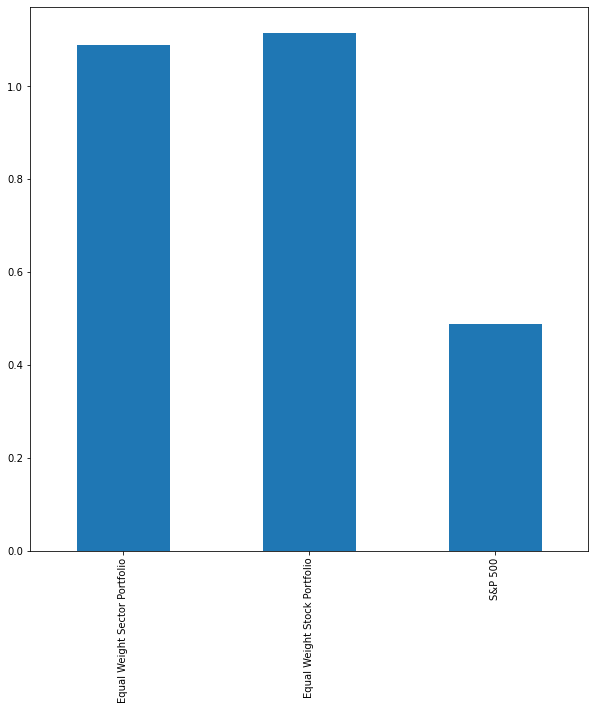

In [123]:
# plot shaarpe ratios for 2008-2009 to better visualize
sharpe_ratios_2020.plot(kind = "bar", figsize=(10,10))

In [124]:
# for Monte Carlo Simulation purposes, we will be using the best risk adjusted portfolio, Equal Weight Stock Protfolio Strategy, and using the duration of 2 yrs to mimic the approximate duration of the previous recession experienced due the the financial crisis that commenced in late 2007
# concat full stock data for analysis and apply weight allocation proposed in the Equal Weight Stock Portfolio for the simulation

# Format current date as ISO format
start_reference_2020 = pd.Timestamp("2019-09-11", tz="America/Toronto").isoformat()
end_reference_2020 = pd.Timestamp("2020-09-11", tz="America/Toronto").isoformat()
# Set the tickers
tickers = ["AWK", "NEE", "XEL", "COST", "WMT", "AMZN", "DLTR", "ORCL", "AAPL", "NFLX"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_2020_eql_weight_stock = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_reference_2020,
    end = end_reference_2020
).df

df_2020_eql_weight_stock.head()

AAPL                                       AMZN  \
                             open    high     low   close    volume     open   
time                                                                           
2020-04-22 00:00:00-04:00  273.61  277.58  272.20  276.09  95665531  2369.00   
2020-04-23 00:00:00-04:00  275.87  281.75  274.87  274.87  55290604  2399.98   
2020-04-24 00:00:00-04:00  277.20  283.01  277.00  282.95  84909438  2417.00   
2020-04-27 00:00:00-04:00  281.80  284.54  279.95  283.25  52652760  2443.20   
2020-04-28 00:00:00-04:00  285.08  285.83  278.20  278.57  24567863  2372.10   

                                                                 ...     WMT  \
                               high      low    close    volume  ...    open   
time                                                             ...           
2020-04-22 00:00:00-04:00  2394.000  2351.00  2366.54  13904142  ...  130.00   
2020-04-23 00:00:00-04:00  2424.220  2382.08  2399.44   8913313  ...  129.85   
2020-04-24 00:00:00-04:00  2420.433  2382.00  2410.00  10481568  ...  129.35   
2020-04-27 00:00:00-04:00  2444.880  2363.00  2376.82  10185891  ...  130.00   
2020-04-28 00:00:00-04:00  2373.500  2306.00  2314.08   4643171  ...  128.28   

                                                                XEL           \
                               high     low   close   volume   open     high   
time                                                                           
2020-04-22 00:00:00-04:00  132.2300  128.90  131.51  5348947  64.37  65.6200   
2020-04-23 00:00:00-04:00  131.0895  127.73  128.54  8855906  64.89  65.4300   
2020-04-24 00:00:00-04:00  129.8900  128.56  129.43  4624835  63.31  64.6499   
2020-04-27 00:00:00-04:00  130.3076  128.17  128.22  4797540  64.79  65.6700   
2020-04-28 00:00:00-04:00  130.2400  127.70  128.01  6422893  66.01  66.8700   

                                                  
                             low  close   volume  
time                                              
2020-04-22 00:00:00-04:00  64.08  65.27  5530754  
2020-04-23 00:00:00-04:00  63.40  64.39  8322077  
2020-04-24 00:00:00-04:00  63.31  64.56  4662832  
2020-04-27 00:00:00-04:00  64.77  65.49  6922717  
2020-04-28 00:00:00-04:00  65.44  66.17  2763265  

[5 rows x 50 columns]

In [125]:
MC_2yrs_2020 = MCSimulation(
    portfolio_data=df_2020_eql_weight_stock,
    weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    num_simulation = 500,
    num_trading_days = 252*2
)

In [126]:
# Printing the simulation input data
MC_2yrs_2020.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2020-04-22 00:00:00-04:00  273.61  277.58  272.20  276.09  95665531   
2020-04-23 00:00:00-04:00  275.87  281.75  274.87  274.87  55290604   
2020-04-24 00:00:00-04:00  277.20  283.01  277.00  282.95  84909438   
2020-04-27 00:00:00-04:00  281.80  284.54  279.95  283.25  52652760   
2020-04-28 00:00:00-04:00  285.08  285.83  278.20  278.57  24567863   

                                           AMZN                              \
                          daily_return     open      high      low    close   
time                                                                          
2020-04-22 00:00:00-04:00          NaN  2369.00  2394.000  2351.00  2366.54   
2020-04-23 00:00:00-04:00    -0.004419  2399.98  2424.220  2382.08  2399.44   
2020-04-24 00:00:00-04:00     0.029396  2417.00  2420.433  2382.00  2410.00   
2020-04-27 00:00:00-04:00     0.001060  2443.20  2444.880  2363.00  2376.82   
2020-04-28 00:00:00-04:00    -0.016523  2372.10  2373.500  2306.00  2314.08   

                           ...     WMT                                  XEL  \
                           ...     low   close   volume daily_return   open   
time                       ...                                                
2020-04-22 00:00:00-04:00  ...  128.90  131.51  5348947          NaN  64.37   
2020-04-23 00:00:00-04:00  ...  127.73  128.54  8855906    -0.022584  64.89   
2020-04-24 00:00:00-04:00  ...  128.56  129.43  4624835     0.006924  63.31   
2020-04-27 00:00:00-04:00  ...  128.17  128.22  4797540    -0.009349  64.79   
2020-04-28 00:00:00-04:00  ...  127.70  128.01  6422893    -0.001638  66.01   

                                                                        
                              high    low  close   volume daily_return  
time                                                                    
2020-04-22 00:00:00-04:00  65.6200  64.08  65.27  5530754          NaN  
2020-04-23 00:00:00-04:00  65.4300  63.40  64.39  8322077    -0.013482  
2020-04-24 00:00:00-04:00  64.6499  63.31  64.56  4662832     0.002640  
2020-04-27 00:00:00-04:00  65.6700  64.77  65.49  6922717     0.014405  
2020-04-28 00:00:00-04:00  66.8700  65.44  66.17  2763265     0.010383  

[5 rows x 60 columns]

In [127]:
# Running a Monte Carlo simulation to forecast 2 years cumulative returns
MC_2yrs_2020.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012203,1.001786,0.996721,1.021523,1.007966,0.988928,1.023191,0.988763,0.983051,0.996554,...,1.006850,0.994578,0.989332,0.995655,1.006009,1.006910,1.014787,0.996794,1.000266,1.006416
2,1.018271,0.997179,1.006134,1.031114,1.015257,0.994559,1.009911,0.973964,1.002364,0.992321,...,1.002565,0.991931,1.004099,1.017497,1.009376,0.994515,1.011689,1.002728,1.007075,0.988139
3,1.026679,0.993710,1.010859,1.029418,1.019568,0.995097,1.005153,0.985122,1.004395,0.986161,...,1.014229,0.988053,1.005059,1.003164,1.007765,0.999305,1.028077,1.003445,1.006831,0.979438
4,1.024077,0.999542,1.007983,1.012550,1.006190,0.982021,0.998420,0.979414,1.007511,0.998494,...,1.017235,0.996522,0.996923,1.006075,0.993988,0.995457,1.025833,0.998510,0.999318,0.977343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,2.175270,2.063293,1.499165,1.560204,1.707110,1.203635,1.936123,2.053119,1.228193,1.891594,...,1.110329,1.694479,1.263768,1.800119,1.060535,2.175134,1.939390,1.603649,1.980756,1.428680
501,2.194675,2.035905,1.506749,1.543404,1.697810,1.207373,1.944794,2.087949,1.235203,1.880667,...,1.103013,1.713589,1.252809,1.826938,1.072357,2.176175,1.954907,1.600117,1.987249,1.418778
502,2.208615,2.013213,1.488164,1.533380,1.711060,1.198403,1.944769,2.073843,1.236226,1.889035,...,1.085066,1.721713,1.266857,1.875195,1.083437,2.169046,1.981920,1.593697,2.005082,1.434027
503,2.198701,1.996382,1.469589,1.543151,1.689169,1.189208,1.949604,2.076945,1.240512,1.882942,...,1.078513,1.694206,1.271918,1.872732,1.104593,2.165426,1.997341,1.573976,2.022669,1.439568


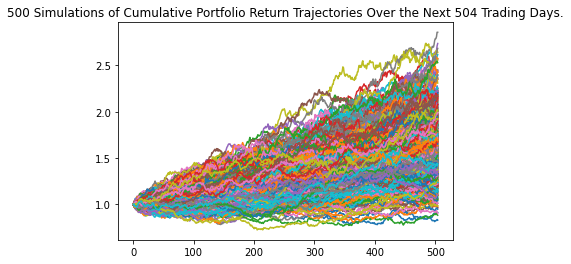

In [128]:
# Plot simulation outcomes
mc_sim_line_plot_eql_weight_stock_2020 = MC_2yrs_2020.plot_simulation()

# save plot for future use
mc_sim_line_plot_eql_weight_stock_2020.get_figure().savefig("MC_2yrs_sim_plot_eql_weight_sector_2020.png", bbox_inches="tight")

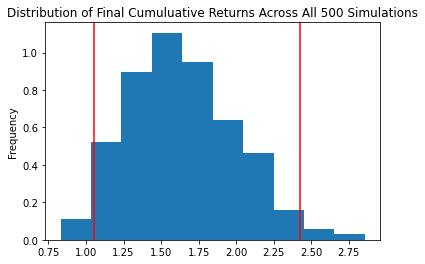

In [129]:
dist_plot_2020 = MC_2yrs_2020.plot_distribution()

# save plot for future use
dist_plot_2020.get_figure().savefig('MC_2yrs_dist_plot_2020.png',bbox_inches='tight')

In [130]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_sim_stats_2020 = MC_2yrs_2020.summarize_cumulative_return()

# Print summary statistics
print(mc_sim_stats_2020)

count           500.000000
mean              1.637521
std               0.360756
min               0.830869
25%               1.359372
50%               1.586921
75%               1.868265
max               2.856319
95% CI Lower      1.050590
95% CI Upper      2.423794
Name: 504, dtype: float64


In [131]:
# test future value of proposed strategy with initial investment of 10,000
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
ci_lower = round(mc_sim_stats_2020[8]*initial_investment,2)
ci_upper = round(mc_sim_stats_2020[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 2 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 2 years will end within in the range of $10505.9 and $24237.94
